<a href="https://colab.research.google.com/github/dhekrasaeed/DRP/blob/master/Drug_Response_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


Kaggle credentials set.


In [2]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

dhekrasaeed_combined_df_path = kagglehub.dataset_download('dhekrasaeed/combined-df')

print('Data source import complete.')


KaggleApiHTTPError: 403 Client Error.

You don't have permission to access resource at URL: https://www.kaggle.com/datasets/dhekrasaeed/combined-df
Please make sure you are authenticated if you are trying to access a private resource or a resource requiring consent.

In [3]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import Normalize
from sklearn.decomposition import PCA
from matplotlib.cm import get_cmap
from sklearn.manifold import TSNE
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.svm import SVR
import tensorflow as tf
import seaborn as sns
import pandas as pd
import numpy as np

In [4]:
combined_df = pd.read_csv("/content/combined_df.csv")

In [5]:
combined_df.head()

Unnamed: 0  PC9_parental_GEF_S12  PC9_parental_GEF_S29  \
0    ENSG00000000003.10__TSPAN6                 74.72                 55.11   
1       ENSG00000000005.5__TNMD                  0.00                  0.00   
2       ENSG00000000419.8__DPM1                 83.84                 66.73   
3      ENSG00000000457.9__SCYL3                  0.91                  0.00   
4  ENSG00000000460.12__C1orf112                  2.20                  0.00   

   PC9_parental_GEF_S28  PC9_parental_GEF_S30  PC9_parental_GEF_S14  \
0                  9.24                  4.81                 41.63   
1                  0.00                  0.00                  0.00   
2                 98.52                  8.67                  0.00   
3                  4.70                  0.00                  0.00   
4                  0.00                  0.00                  0.00   

   PC9_parental_GEF_S34  PC9_parental_GEF_S3  PC9_parental_GEF_S19  \
0                102.47                49.12                 56.21   
1                  0.00                 0.00                  0.00   
2                 26.86                72.81                 18.47   
3                  0.00                 0.00                  1.11   
4                  0.00                 2.22                  0.00   

   PC9_parental_GEF_S10  ...   CIAPIN1    PPFIA4     EPPK1     PSPC1  \
0                 12.68  ...  5.794856  3.115977  3.236775  4.614050   
1                  0.00  ...  5.429998  3.165675  3.293903  3.833966   
2                  4.20  ...  6.166544  3.070921  4.455511  4.108411   
3                  0.00  ...  5.617250  3.318546  8.393024  3.945185   
4                  0.00  ...  5.948226  3.203330  3.278578  3.672100   

    SLC30A2     RNF13     LAMC1     PITX3     SNX24    IL17RE  
0  3.334627  8.512252  5.454001  3.579842  3.719559  3.208217  
1  3.115850  9.187912  7.297341  3.350470  6.678025  3.106149  
2  3.080420  7.986220  7.260711  3.123496  4.627073  3.088657  
3  3.074119  8.615635  6.793222  3.177603  4.703124  3.081756  
4  3.171120  8.673449  6.673377  3.496695  5.829292  3.210553  

[5 rows x 16472 columns]

In [6]:
column_length = len(combined_df["GEFITINIB"])
column_length = len(combined_df["ERLOTINIB"])
print(column_length)
print(column_length)

45
45


In [7]:
first_34969_rows = combined_df.iloc[:4969]
first_34969_rows.head()

Unnamed: 0  PC9_parental_GEF_S12  PC9_parental_GEF_S29  \
0    ENSG00000000003.10__TSPAN6                 74.72                 55.11   
1       ENSG00000000005.5__TNMD                  0.00                  0.00   
2       ENSG00000000419.8__DPM1                 83.84                 66.73   
3      ENSG00000000457.9__SCYL3                  0.91                  0.00   
4  ENSG00000000460.12__C1orf112                  2.20                  0.00   

   PC9_parental_GEF_S28  PC9_parental_GEF_S30  PC9_parental_GEF_S14  \
0                  9.24                  4.81                 41.63   
1                  0.00                  0.00                  0.00   
2                 98.52                  8.67                  0.00   
3                  4.70                  0.00                  0.00   
4                  0.00                  0.00                  0.00   

   PC9_parental_GEF_S34  PC9_parental_GEF_S3  PC9_parental_GEF_S19  \
0                102.47                49.12                 56.21   
1                  0.00                 0.00                  0.00   
2                 26.86                72.81                 18.47   
3                  0.00                 0.00                  1.11   
4                  0.00                 2.22                  0.00   

   PC9_parental_GEF_S10  ...   CIAPIN1    PPFIA4     EPPK1     PSPC1  \
0                 12.68  ...  5.794856  3.115977  3.236775  4.614050   
1                  0.00  ...  5.429998  3.165675  3.293903  3.833966   
2                  4.20  ...  6.166544  3.070921  4.455511  4.108411   
3                  0.00  ...  5.617250  3.318546  8.393024  3.945185   
4                  0.00  ...  5.948226  3.203330  3.278578  3.672100   

    SLC30A2     RNF13     LAMC1     PITX3     SNX24    IL17RE  
0  3.334627  8.512252  5.454001  3.579842  3.719559  3.208217  
1  3.115850  9.187912  7.297341  3.350470  6.678025  3.106149  
2  3.080420  7.986220  7.260711  3.123496  4.627073  3.088657  
3  3.074119  8.615635  6.793222  3.177603  4.703124  3.081756  
4  3.171120  8.673449  6.673377  3.496695  5.829292  3.210553  

[5 rows x 16472 columns]

In [8]:
# Reset the index to treat it as a regular column
first_34969_rows = first_34969_rows.reset_index()

# Now rename the column "Unnamed: 0" to "Gene"
Gene_drug = first_34969_rows.rename(columns={"Unnamed: 0": "Gene"})

In [9]:
Gene_drug.describe()

index  PC9_parental_GEF_S12  PC9_parental_GEF_S29  \
count  45.000000             45.000000             45.000000   
mean   22.000000              8.761111             28.592444   
std    13.133926             17.914048             84.650187   
min     0.000000              0.000000              0.000000   
25%    11.000000              0.000000              0.000000   
50%    22.000000              0.000000              0.000000   
75%    33.000000             10.340000             12.480000   
max    44.000000             83.840000            428.520000   

       PC9_parental_GEF_S28  PC9_parental_GEF_S30  PC9_parental_GEF_S14  \
count             45.000000             45.000000             45.000000   
mean              15.080667             17.416889             12.711556   
std               40.303842             62.018348             32.661384   
min                0.000000              0.000000              0.000000   
25%                0.000000              0.000000              0.000000   
50%                0.000000              0.000000              0.000000   
75%               13.660000              5.760000              6.700000   
max              243.840000            403.290000            163.750000   

       PC9_parental_GEF_S34  PC9_parental_GEF_S3  PC9_parental_GEF_S19  \
count             45.000000            45.000000             45.000000   
mean              10.120000            17.468889             17.157778   
std               23.658627            47.817703             41.370618   
min                0.000000             0.000000              0.000000   
25%                0.000000             0.000000              0.000000   
50%                0.000000             0.000000              0.000000   
75%                3.470000            11.220000              5.250000   
max              105.340000           265.060000            227.470000   

       PC9_parental_GEF_S10  ...    CIAPIN1     PPFIA4      EPPK1      PSPC1  \
count             45.000000  ...  44.000000  44.000000  44.000000  44.000000   
mean              71.739778  ...   5.792751   3.212466   4.464437   4.055647   
std              424.212885  ...   0.376264   0.143388   1.743167   0.358866   
min                0.000000  ...   4.861284   2.959230   2.802210   3.167712   
25%                0.000000  ...   5.585584   3.104422   3.092956   3.823169   
50%                0.000000  ...   5.818648   3.205400   3.544006   4.017027   
75%                4.530000  ...   5.971955   3.318908   5.519280   4.271518   
max             2849.770000  ...   6.738386   3.501837   9.166683   5.049166   

         SLC30A2      RNF13      LAMC1      PITX3      SNX24     IL17RE  
count  44.000000  44.000000  44.000000  44.000000  44.000000  44.000000  
mean    3.122479   8.956395   7.680576   3.453739   5.705542   3.270262  
std     0.152120   0.634805   1.284925   0.207541   0.809249   0.169457  
min     2.911211   7.270230   3.529932   3.090705   3.719559   3.018315  
25%     3.042180   8.546760   7.142516   3.324515   5.271384   3.159869  
50%     3.100578   9.036839   7.896764   3.426150   5.822159   3.237859  
75%     3.152788   9.339161   8.723321   3.569837   6.042921   3.341719  
max     3.817806  10.096162   9.668444   4.013404   7.618580   3.744098  

[8 rows x 16472 columns]

In [10]:
Gene_drug.head()

index                          Gene  PC9_parental_GEF_S12  \
0      0    ENSG00000000003.10__TSPAN6                 74.72   
1      1       ENSG00000000005.5__TNMD                  0.00   
2      2       ENSG00000000419.8__DPM1                 83.84   
3      3      ENSG00000000457.9__SCYL3                  0.91   
4      4  ENSG00000000460.12__C1orf112                  2.20   

   PC9_parental_GEF_S29  PC9_parental_GEF_S28  PC9_parental_GEF_S30  \
0                 55.11                  9.24                  4.81   
1                  0.00                  0.00                  0.00   
2                 66.73                 98.52                  8.67   
3                  0.00                  4.70                  0.00   
4                  0.00                  0.00                  0.00   

   PC9_parental_GEF_S14  PC9_parental_GEF_S34  PC9_parental_GEF_S3  \
0                 41.63                102.47                49.12   
1                  0.00                  0.00                 0.00   
2                  0.00                 26.86                72.81   
3                  0.00                  0.00                 0.00   
4                  0.00                  0.00                 2.22   

   PC9_parental_GEF_S19  ...   CIAPIN1    PPFIA4     EPPK1     PSPC1  \
0                 56.21  ...  5.794856  3.115977  3.236775  4.614050   
1                  0.00  ...  5.429998  3.165675  3.293903  3.833966   
2                 18.47  ...  6.166544  3.070921  4.455511  4.108411   
3                  1.11  ...  5.617250  3.318546  8.393024  3.945185   
4                  0.00  ...  5.948226  3.203330  3.278578  3.672100   

    SLC30A2     RNF13     LAMC1     PITX3     SNX24    IL17RE  
0  3.334627  8.512252  5.454001  3.579842  3.719559  3.208217  
1  3.115850  9.187912  7.297341  3.350470  6.678025  3.106149  
2  3.080420  7.986220  7.260711  3.123496  4.627073  3.088657  
3  3.074119  8.615635  6.793222  3.177603  4.703124  3.081756  
4  3.171120  8.673449  6.673377  3.496695  5.829292  3.210553  

[5 rows x 16473 columns]

In [11]:
Gene_drug.head()

index                          Gene  PC9_parental_GEF_S12  \
0      0    ENSG00000000003.10__TSPAN6                 74.72   
1      1       ENSG00000000005.5__TNMD                  0.00   
2      2       ENSG00000000419.8__DPM1                 83.84   
3      3      ENSG00000000457.9__SCYL3                  0.91   
4      4  ENSG00000000460.12__C1orf112                  2.20   

   PC9_parental_GEF_S29  PC9_parental_GEF_S28  PC9_parental_GEF_S30  \
0                 55.11                  9.24                  4.81   
1                  0.00                  0.00                  0.00   
2                 66.73                 98.52                  8.67   
3                  0.00                  4.70                  0.00   
4                  0.00                  0.00                  0.00   

   PC9_parental_GEF_S14  PC9_parental_GEF_S34  PC9_parental_GEF_S3  \
0                 41.63                102.47                49.12   
1                  0.00                  0.00                 0.00   
2                  0.00                 26.86                72.81   
3                  0.00                  0.00                 0.00   
4                  0.00                  0.00                 2.22   

   PC9_parental_GEF_S19  ...   CIAPIN1    PPFIA4     EPPK1     PSPC1  \
0                 56.21  ...  5.794856  3.115977  3.236775  4.614050   
1                  0.00  ...  5.429998  3.165675  3.293903  3.833966   
2                 18.47  ...  6.166544  3.070921  4.455511  4.108411   
3                  1.11  ...  5.617250  3.318546  8.393024  3.945185   
4                  0.00  ...  5.948226  3.203330  3.278578  3.672100   

    SLC30A2     RNF13     LAMC1     PITX3     SNX24    IL17RE  
0  3.334627  8.512252  5.454001  3.579842  3.719559  3.208217  
1  3.115850  9.187912  7.297341  3.350470  6.678025  3.106149  
2  3.080420  7.986220  7.260711  3.123496  4.627073  3.088657  
3  3.074119  8.615635  6.793222  3.177603  4.703124  3.081756  
4  3.171120  8.673449  6.673377  3.496695  5.829292  3.210553  

[5 rows x 16473 columns]

# Visualization

<ipython-input-12-b0234a45d874>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=gene_counts.index[:20], x=gene_counts.values[:20], palette='viridis')


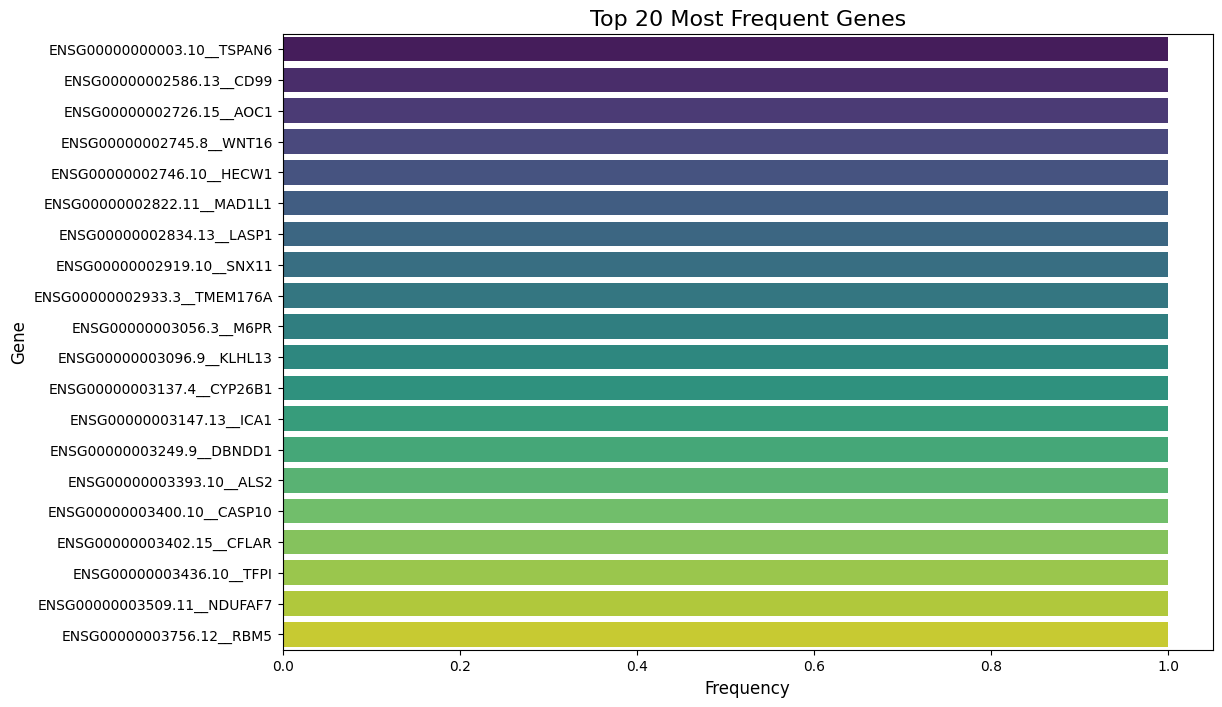

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the frequency of each gene
gene_counts = Gene_drug['Gene'].value_counts()

# Plot the top 20 most frequent genes
plt.figure(figsize=(12, 8))
sns.barplot(y=gene_counts.index[:20], x=gene_counts.values[:20], palette='viridis')
plt.title('Top 20 Most Frequent Genes', fontsize=16)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Gene', fontsize=12)
plt.show()


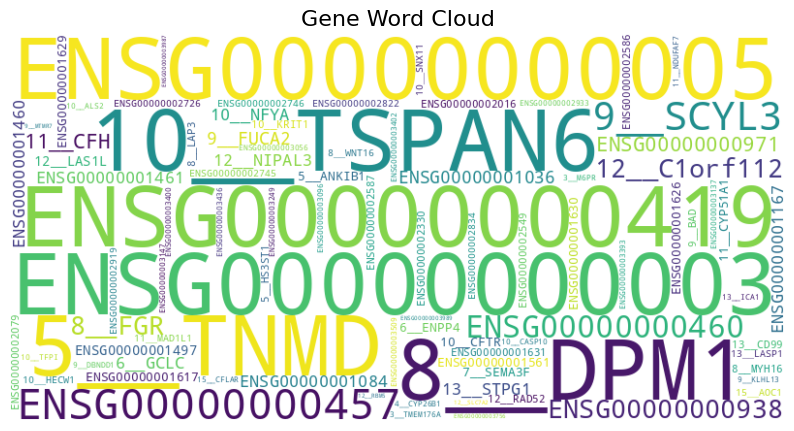

In [13]:
from wordcloud import WordCloud

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(Gene_drug['Gene']))

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Gene Word Cloud', fontsize=16)
plt.show()


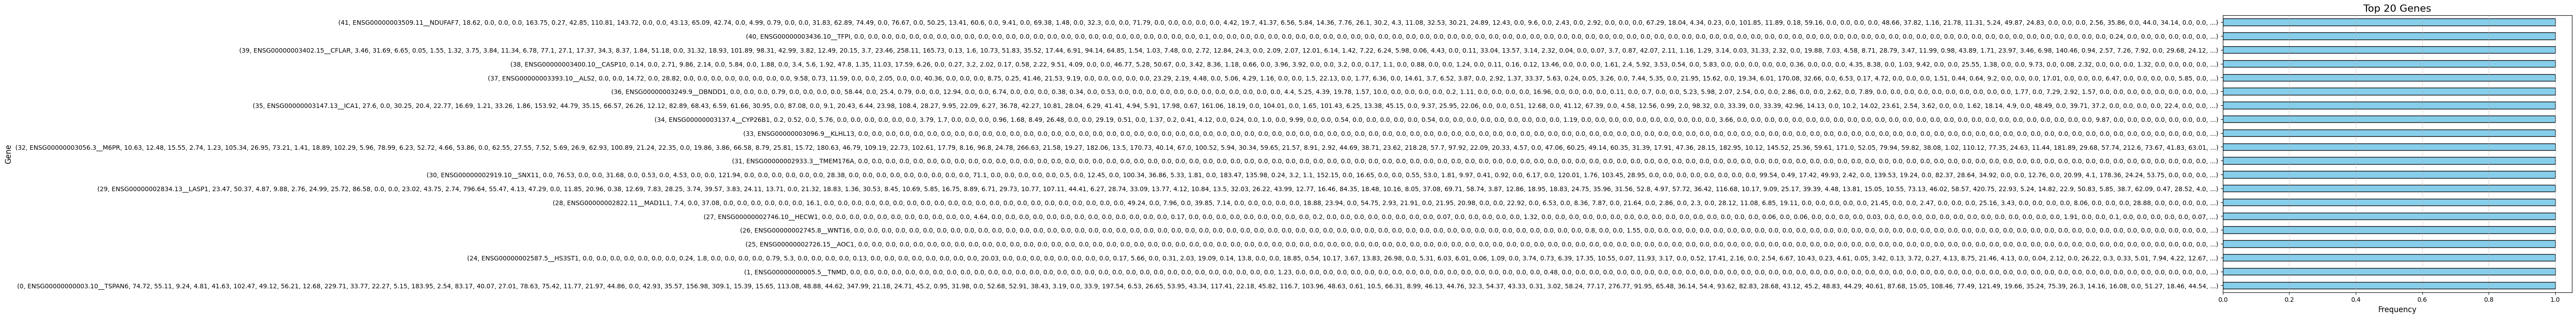

In [14]:
import matplotlib.pyplot as plt

# Count the occurrences of each gene
gene_counts = Gene_drug.value_counts().head(20)  # Limit to top 20 for clarity

# Plot the bar chart
plt.figure(figsize=(10, 8))
gene_counts.plot(kind='barh', color='skyblue', edgecolor='black')
plt.title('Top 20 Genes', fontsize=16)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Gene', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


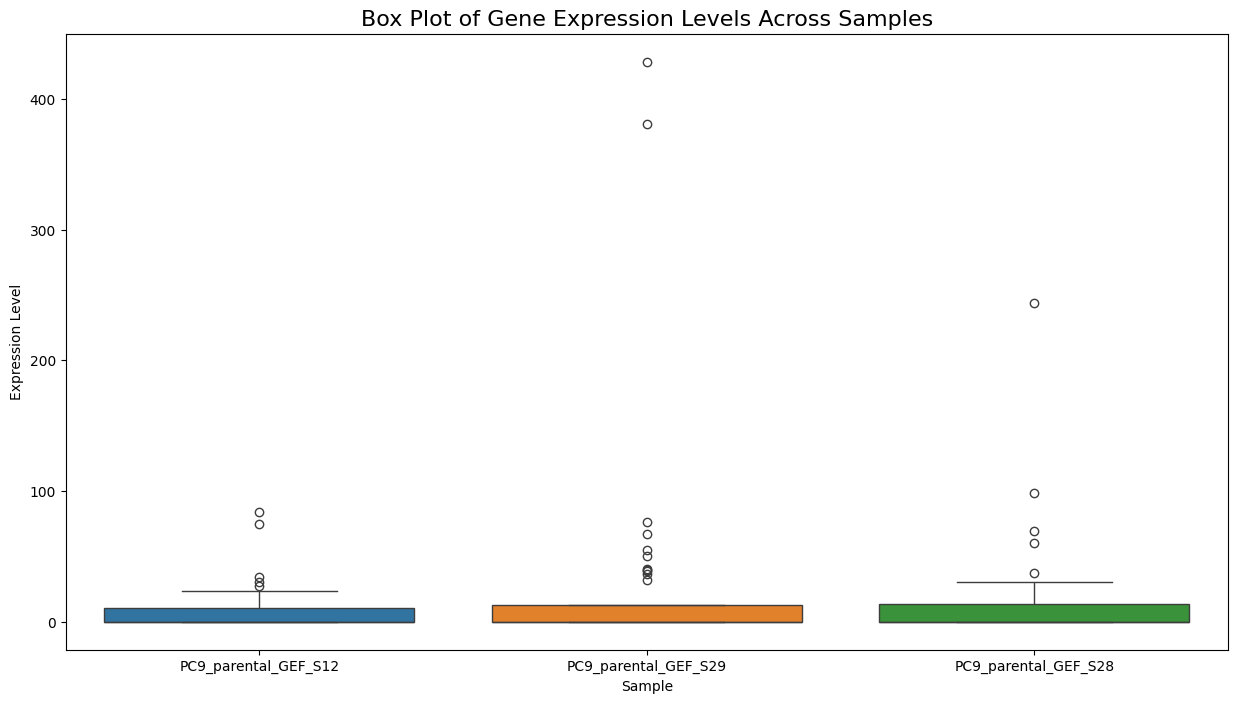

In [15]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=Gene_drug[['PC9_parental_GEF_S12', 'PC9_parental_GEF_S29', 'PC9_parental_GEF_S28']])
plt.title('Box Plot of Gene Expression Levels Across Samples', fontsize=16)
plt.xlabel('Sample')
plt.ylabel('Expression Level')
plt.show()


In [16]:
import pandas as pd

# Assuming combined_df is your DataFrame
one_hot_encoded_df = pd.get_dummies(Gene_drug, columns=["Gene"])

In [17]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit and transform the one-hot encoded DataFrame
normalized_df = pd.DataFrame(scaler.fit_transform(one_hot_encoded_df), columns=one_hot_encoded_df.columns)

# Display the normalized DataFrame
normalized_df.head()


index  PC9_parental_GEF_S12  PC9_parental_GEF_S29  PC9_parental_GEF_S28  \
0  0.000000              0.891221              0.128605              0.037894   
1  0.022727              0.000000              0.000000              0.000000   
2  0.045455              1.000000              0.155722              0.404035   
3  0.068182              0.010854              0.000000              0.019275   
4  0.090909              0.026240              0.000000              0.000000   

   PC9_parental_GEF_S30  PC9_parental_GEF_S14  PC9_parental_GEF_S34  \
0              0.011927              0.254229              0.972755   
1              0.000000              0.000000              0.000000   
2              0.021498              0.000000              0.254984   
3              0.000000              0.000000              0.000000   
4              0.000000              0.000000              0.000000   

   PC9_parental_GEF_S3  PC9_parental_GEF_S19  PC9_parental_GEF_S10  ...  \
0             0.185317              0.247110              0.004449  ...   
1             0.000000              0.000000              0.000000  ...   
2             0.274693              0.081198              0.001474  ...   
3             0.000000              0.004880              0.000000  ...   
4             0.008375              0.000000              0.000000  ...   

   Gene_ENSG00000003147.13__ICA1  Gene_ENSG00000003249.9__DBNDD1  \
0                            0.0                             0.0   
1                            0.0                             0.0   
2                            0.0                             0.0   
3                            0.0                             0.0   
4                            0.0                             0.0   

   Gene_ENSG00000003393.10__ALS2  Gene_ENSG00000003400.10__CASP10  \
0                            0.0                              0.0   
1                            0.0                              0.0   
2                            0.0                              0.0   
3                            0.0                              0.0   
4                            0.0                              0.0   

   Gene_ENSG00000003402.15__CFLAR  Gene_ENSG00000003436.10__TFPI  \
0                             0.0                            0.0   
1                             0.0                            0.0   
2                             0.0                            0.0   
3                             0.0                            0.0   
4                             0.0                            0.0   

   Gene_ENSG00000003509.11__NDUFAF7  Gene_ENSG00000003756.12__RBM5  \
0                               0.0                            0.0   
1                               0.0                            0.0   
2                               0.0                            0.0   
3                               0.0                            0.0   
4                               0.0                            0.0   

   Gene_ENSG00000003987.9__MTMR7  Gene_ENSG00000003989.12__SLC7A2  
0                            0.0                              0.0  
1                            0.0                              0.0  
2                            0.0                              0.0  
3                            0.0                              0.0  
4                            0.0                              0.0  

[5 rows x 16517 columns]

In [18]:
# Fill NaN values with the mean of each column
normalized_df_filled = normalized_df.fillna(normalized_df.mean())

In [19]:
Final_df=normalized_df_filled

In [20]:
Gene_drug=Final_df

In [21]:
Final_df.to_csv('final_df.csv', index=False)

In [22]:
Gene_drug = pd.read_csv('/content/final_df.csv')
Gene_drug.head()

index  PC9_parental_GEF_S12  PC9_parental_GEF_S29  PC9_parental_GEF_S28  \
0  0.000000              0.891221              0.128605              0.037894   
1  0.022727              0.000000              0.000000              0.000000   
2  0.045455              1.000000              0.155722              0.404035   
3  0.068182              0.010854              0.000000              0.019275   
4  0.090909              0.026240              0.000000              0.000000   

   PC9_parental_GEF_S30  PC9_parental_GEF_S14  PC9_parental_GEF_S34  \
0              0.011927              0.254229              0.972755   
1              0.000000              0.000000              0.000000   
2              0.021498              0.000000              0.254984   
3              0.000000              0.000000              0.000000   
4              0.000000              0.000000              0.000000   

   PC9_parental_GEF_S3  PC9_parental_GEF_S19  PC9_parental_GEF_S10  ...  \
0             0.185317              0.247110              0.004449  ...   
1             0.000000              0.000000              0.000000  ...   
2             0.274693              0.081198              0.001474  ...   
3             0.000000              0.004880              0.000000  ...   
4             0.008375              0.000000              0.000000  ...   

   Gene_ENSG00000003147.13__ICA1  Gene_ENSG00000003249.9__DBNDD1  \
0                            0.0                             0.0   
1                            0.0                             0.0   
2                            0.0                             0.0   
3                            0.0                             0.0   
4                            0.0                             0.0   

   Gene_ENSG00000003393.10__ALS2  Gene_ENSG00000003400.10__CASP10  \
0                            0.0                              0.0   
1                            0.0                              0.0   
2                            0.0                              0.0   
3                            0.0                              0.0   
4                            0.0                              0.0   

   Gene_ENSG00000003402.15__CFLAR  Gene_ENSG00000003436.10__TFPI  \
0                             0.0                            0.0   
1                             0.0                            0.0   
2                             0.0                            0.0   
3                             0.0                            0.0   
4                             0.0                            0.0   

   Gene_ENSG00000003509.11__NDUFAF7  Gene_ENSG00000003756.12__RBM5  \
0                               0.0                            0.0   
1                               0.0                            0.0   
2                               0.0                            0.0   
3                               0.0                            0.0   
4                               0.0                            0.0   

   Gene_ENSG00000003987.9__MTMR7  Gene_ENSG00000003989.12__SLC7A2  
0                            0.0                              0.0  
1                            0.0                              0.0  
2                            0.0                              0.0  
3                            0.0                              0.0  
4                            0.0                              0.0  

[5 rows x 16517 columns]

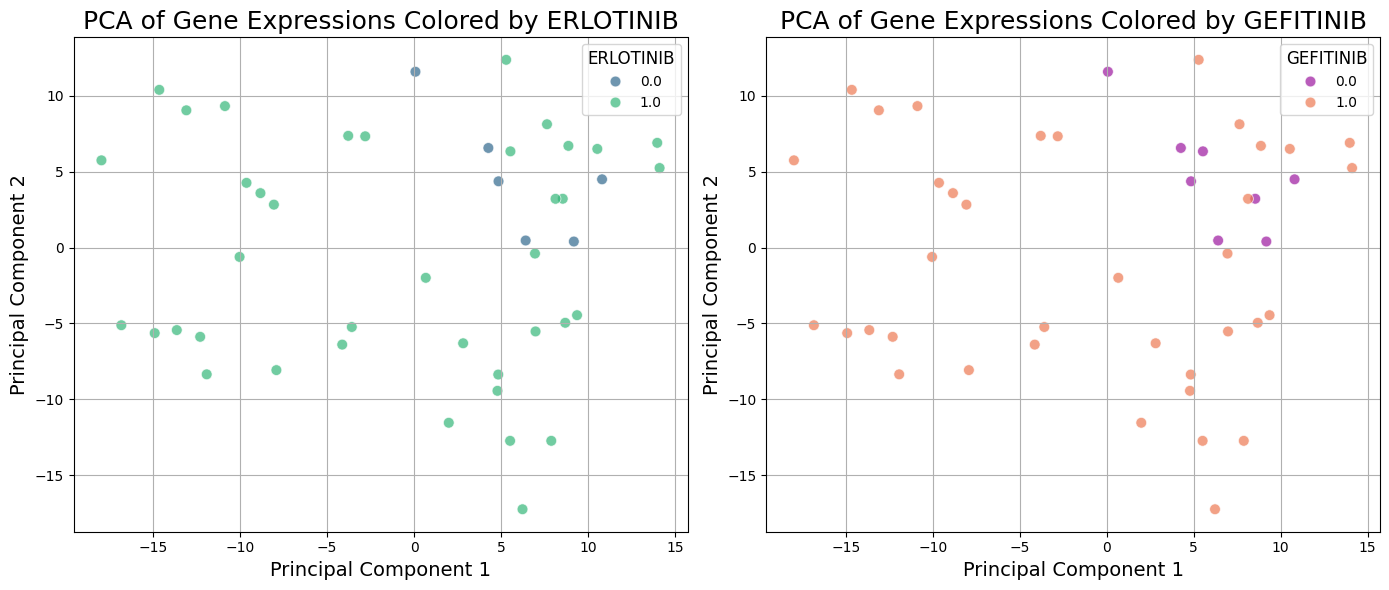

In [24]:
import pandas as pd
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# Load the gene expression data
Gene_drug = pd.read_csv('/content/final_df.csv')

# Define the target columns
target_columns = ['ERLOTINIB', 'GEFITINIB']

# Remove the target columns from the dataset for PCA
X = Gene_drug.drop(columns=target_columns)

# Perform PCA on the remaining features
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)

# Add PCA results back to the dataframe
Gene_drug['PCA1'] = pca_result[:, 0]
Gene_drug['PCA2'] = pca_result[:, 1]

# Plotting PCA results with hue based on 'ERLOTINIB' and 'GEFITINIB'
plt.figure(figsize=(14, 6))

# First subplot for ERLOTINIB
plt.subplot(1, 2, 1)
sns.scatterplot(x='PCA1', y='PCA2', hue='ERLOTINIB', data=Gene_drug, palette='viridis', s=60, alpha=0.7)
plt.title('PCA of Gene Expressions Colored by ERLOTINIB', fontsize=18)
plt.xlabel('Principal Component 1', fontsize=14)
plt.ylabel('Principal Component 2', fontsize=14)
plt.legend(title='ERLOTINIB', loc='upper right', fontsize=10, title_fontsize=12)
plt.grid(True)

# Second subplot for GEFITINIB
plt.subplot(1, 2, 2)
sns.scatterplot(x='PCA1', y='PCA2', hue='GEFITINIB', data=Gene_drug, palette='plasma', s=60, alpha=0.7)
plt.title('PCA of Gene Expressions Colored by GEFITINIB', fontsize=18)
plt.xlabel('Principal Component 1', fontsize=14)
plt.ylabel('Principal Component 2', fontsize=14)
plt.legend(title='GEFITINIB', loc='upper right', fontsize=10, title_fontsize=12)
plt.grid(True)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


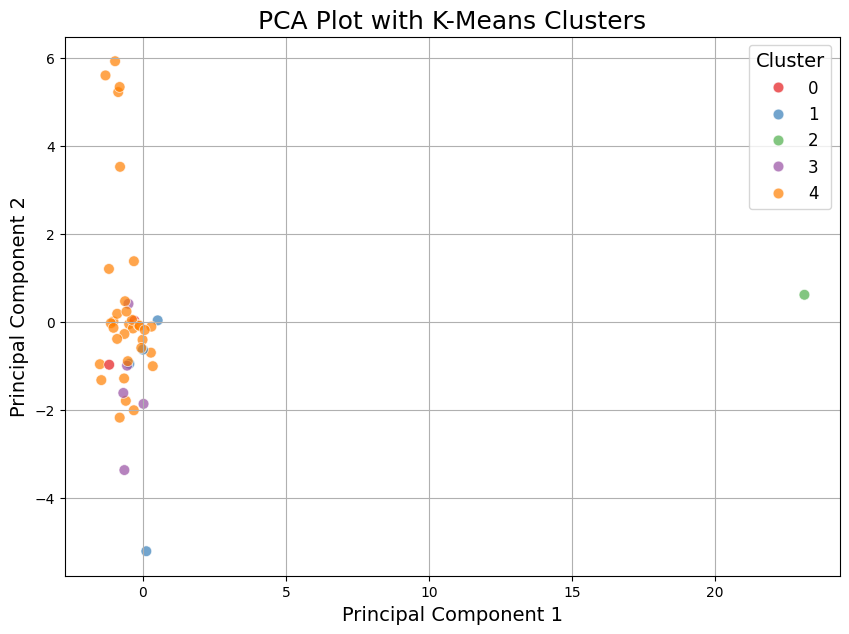

In [26]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Load the gene expression data
Gene_drug = pd.read_csv('/content/final_df.csv')

# List of genes to group by
genes_to_group = [
    'PLP1', 'ESM1', 'PRSS1', 'SERPINB3', 'PHOX2B', 'KRT6A', 'ROBO2', 'CYTIP',
    'PASD1', 'IKZF1', 'SLC1A6', 'COL1A1', 'IGLL1', 'MYCN', 'FGB',
    'CDH17', 'HLA-DQA1', 'CHRNA3', 'PLEK', 'TNFRSF17', 'GCSAM', 'SLC45A2', 'SASH3',
    'AMER2', 'ELF5', 'TM4SF4', 'LCP2', 'CALCA', 'SLC44A4', 'P2RY10', 'PTPRC', 'OLR1',
    'KCNA1', 'ADH1C', 'GABRP', 'TYR', 'ITGAL', 'UGT3A2', 'GPR18', 'CPN1', 'UPK1B',
    'INSM2', 'SYCP1', 'STAP1', 'DPP6', 'RGS18', 'CXCL5', 'ITM2A'
]

# Select relevant data (excluding the target columns for clustering)
X = Gene_drug[genes_to_group]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)  # Adjust the number of clusters as needed
Gene_drug['Cluster'] = kmeans.fit_predict(X_scaled)

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

# Create a DataFrame for PCA results
pca_df = pd.DataFrame(pca_result, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = Gene_drug['Cluster']

# Plot PCA results with clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', palette='Set1', data=pca_df, s=60, alpha=0.7)
plt.title('PCA Plot with K-Means Clusters', fontsize=18)
plt.xlabel('Principal Component 1', fontsize=14)
plt.ylabel('Principal Component 2', fontsize=14)
plt.legend(title='Cluster', loc='upper right', fontsize=12, title_fontsize=14)
plt.grid(True)

# Show the plot
plt.show()


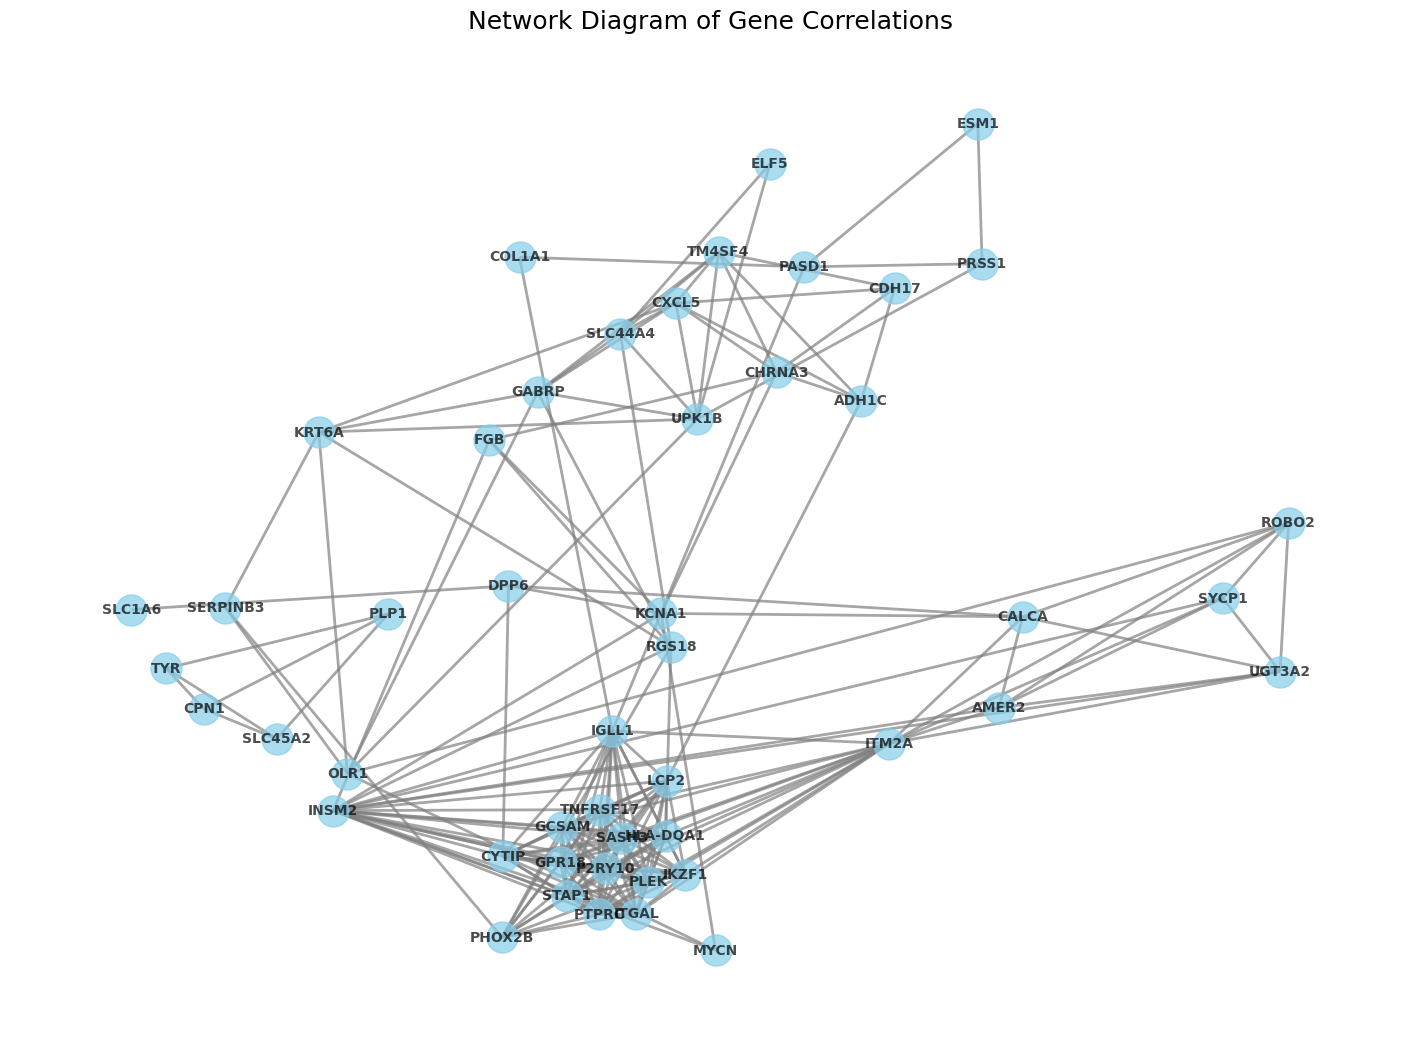

In [28]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load the gene expression data
Gene_drug = pd.read_csv('/content/final_df.csv')

# List of genes to include in the network
genes_to_group = [
    'PLP1', 'ESM1', 'PRSS1', 'SERPINB3', 'PHOX2B', 'KRT6A', 'ROBO2', 'CYTIP',
    'PASD1', 'IKZF1', 'SLC1A6', 'COL1A1', 'IGLL1', 'MYCN', 'FGB',
    'CDH17', 'HLA-DQA1', 'CHRNA3', 'PLEK', 'TNFRSF17', 'GCSAM', 'SLC45A2', 'SASH3',
    'AMER2', 'ELF5', 'TM4SF4', 'LCP2', 'CALCA', 'SLC44A4', 'P2RY10', 'PTPRC', 'OLR1',
    'KCNA1', 'ADH1C', 'GABRP', 'TYR', 'ITGAL', 'UGT3A2', 'GPR18', 'CPN1', 'UPK1B',
    'INSM2', 'SYCP1', 'STAP1', 'DPP6', 'RGS18', 'CXCL5', 'ITM2A'
]

# Select relevant data
X = Gene_drug[genes_to_group]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Compute the correlation matrix
correlation_matrix = pd.DataFrame(X_scaled, columns=genes_to_group).corr()

# Create a graph object
G = nx.Graph()

# Add nodes (genes) to the graph
for gene in genes_to_group:
    G.add_node(gene)

# Add edges based on correlation values
threshold = 0.2  # Set a threshold for strong correlations
for i in range(len(genes_to_group)):
    for j in range(i+1, len(genes_to_group)):
        if np.abs(correlation_matrix.iloc[i, j]) > threshold:
            G.add_edge(genes_to_group[i], genes_to_group[j], weight=correlation_matrix.iloc[i, j])

# Plot the network diagram
plt.figure(figsize=(14, 10))
pos = nx.spring_layout(G, k=0.5)  # Positions the nodes in a visually pleasing way
nx.draw(G, pos, with_labels=True, node_size=500, node_color='skyblue', font_size=10, font_weight='bold', edge_color='gray', width=2, alpha=0.7)
plt.title('Network Diagram of Gene Correlations', fontsize=18)
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load the gene expression data
Gene_drug = pd.read_csv('/content/final_df.csv')

# Exclude the target columns from the list of features
target_columns = ['ERLOTINIB', 'GEFITINIB']
features = [col for col in Gene_drug.columns if col not in target_columns]

# Select relevant data (all features except the target columns)
X = Gene_drug[features]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Compute the correlation matrix
correlation_matrix = pd.DataFrame(X_scaled, columns=features).corr()

# Create a graph object
G = nx.Graph()

# Add nodes (features) to the graph
for feature in features:
    G.add_node(feature)

# Add edges based on correlation values
threshold = 0.2  # Set a threshold for strong correlations
for i in range(len(features)):
    for j in range(i+1, len(features)):
        if np.abs(correlation_matrix.iloc[i, j]) > threshold:
            G.add_edge(features[i], features[j], weight=correlation_matrix.iloc[i, j])

# Plot the network diagram
plt.figure(figsize=(20, 16))  # Adjust the figure size for better visibility with all features
pos = nx.spring_layout(G, k=0.3)  # Adjust 'k' for better spacing if needed
nx.draw(G, pos, with_labels=True, node_size=300, node_color='lightblue', font_size=8, font_weight='bold', edge_color='gray', width=1, alpha=0.7)
plt.title('Network Diagram of All Feature Correlations', fontsize=20)
plt.show()


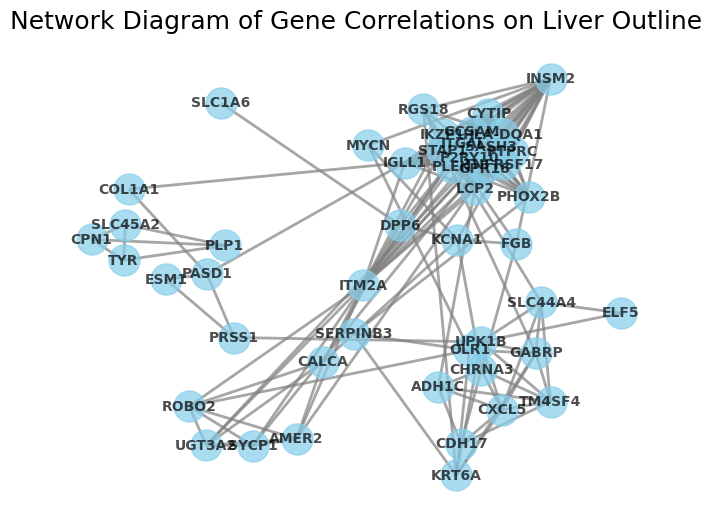

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import networkx as nx
from sklearn.preprocessing import StandardScaler

# Load gene expression data
Gene_drug = pd.read_csv('/content/final_df.csv')

# List of all genes (or use a subset if needed)
genes_to_group = [
    'PLP1', 'ESM1', 'PRSS1', 'SERPINB3', 'PHOX2B', 'KRT6A', 'ROBO2', 'CYTIP',
    'PASD1', 'IKZF1', 'SLC1A6', 'COL1A1', 'IGLL1', 'MYCN', 'FGB',
    'CDH17', 'HLA-DQA1', 'CHRNA3', 'PLEK', 'TNFRSF17', 'GCSAM', 'SLC45A2', 'SASH3',
    'AMER2', 'ELF5', 'TM4SF4', 'LCP2', 'CALCA', 'SLC44A4', 'P2RY10', 'PTPRC', 'OLR1',
    'KCNA1', 'ADH1C', 'GABRP', 'TYR', 'ITGAL', 'UGT3A2', 'GPR18', 'CPN1', 'UPK1B',
    'INSM2', 'SYCP1', 'STAP1', 'DPP6', 'RGS18', 'CXCL5', 'ITM2A'
]

# Select relevant data
X = Gene_drug[genes_to_group]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Compute the correlation matrix
correlation_matrix = pd.DataFrame(X_scaled, columns=genes_to_group).corr()

# Create a graph object
G = nx.Graph()

# Add nodes (genes) to the graph
for gene in genes_to_group:
    G.add_node(gene)

# Add edges based on correlation values
threshold = 0.2  # Set a threshold for strong correlations
for i in range(len(genes_to_group)):
    for j in range(i+1, len(genes_to_group)):
        if np.abs(correlation_matrix.iloc[i, j]) > threshold:
            G.add_edge(genes_to_group[i], genes_to_group[j], weight=correlation_matrix.iloc[i, j])

# Load liver image
liver_img = mpimg.imread('/kaggle/input/liver-diagram')  # Replace with your image path

# Plotting
plt.figure(figsize=(14, 10))
plt.imshow(liver_img, aspect='auto', extent=[-10, 10, -10, 10])  # Adjust extent as needed

# Position the nodes
pos = nx.spring_layout(G, k=0.5)  # Positions nodes using a spring layout

# Draw the network
nx.draw(G, pos, with_labels=True, node_size=500, node_color='skyblue', font_size=10, font_weight='bold', edge_color='gray', width=2, alpha=0.7)

plt.title('Network Diagram of Gene Correlations on Liver Outline', fontsize=18)
plt.axis('off')  # Turn off the axis
plt.show()


ValueError: Unable to determine Axes to steal space for Colorbar. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.

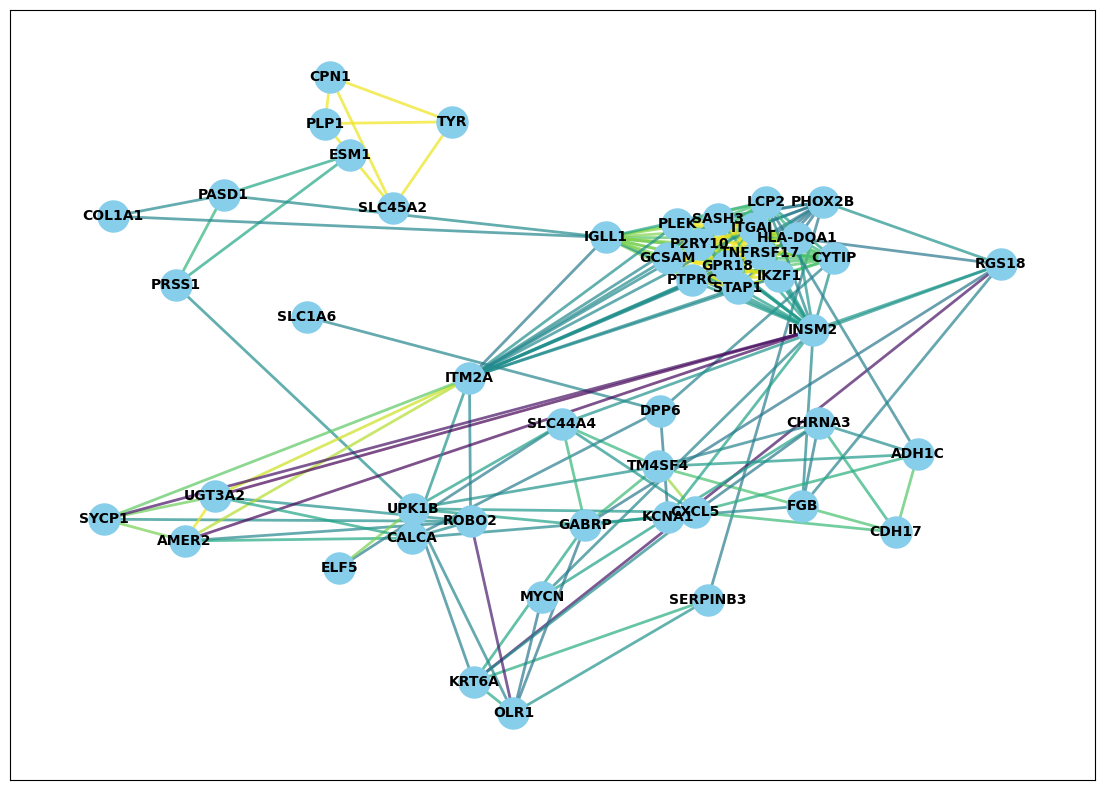

In [5]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import matplotlib.cm as cm
import matplotlib.colorbar as cbar
from matplotlib.colors import Normalize

# Load the gene expression data
Gene_drug = pd.read_csv('/content/final_df.csv')

# List of genes to include in the network
genes_to_group = [
    'PLP1', 'ESM1', 'PRSS1', 'SERPINB3', 'PHOX2B', 'KRT6A', 'ROBO2', 'CYTIP',
    'PASD1', 'IKZF1', 'SLC1A6', 'COL1A1', 'IGLL1', 'MYCN', 'FGB',
    'CDH17', 'HLA-DQA1', 'CHRNA3', 'PLEK', 'TNFRSF17', 'GCSAM', 'SLC45A2', 'SASH3',
    'AMER2', 'ELF5', 'TM4SF4', 'LCP2', 'CALCA', 'SLC44A4', 'P2RY10', 'PTPRC', 'OLR1',
    'KCNA1', 'ADH1C', 'GABRP', 'TYR', 'ITGAL', 'UGT3A2', 'GPR18', 'CPN1', 'UPK1B',
    'INSM2', 'SYCP1', 'STAP1', 'DPP6', 'RGS18', 'CXCL5', 'ITM2A'
]

# Select relevant data
X = Gene_drug[genes_to_group]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Compute the correlation matrix
correlation_matrix = pd.DataFrame(X_scaled, columns=genes_to_group).corr()

# Create a graph object
G = nx.Graph()

# Add nodes (genes) to the graph
for gene in genes_to_group:
    G.add_node(gene)

# Add edges based on correlation values
threshold = 0.2  # Set a threshold for strong correlations
for i in range(len(genes_to_group)):
    for j in range(i+1, len(genes_to_group)):
        if np.abs(correlation_matrix.iloc[i, j]) > threshold:
            G.add_edge(genes_to_group[i], genes_to_group[j], weight=correlation_matrix.iloc[i, j])

# Generate positions for the nodes
pos = nx.spring_layout(G, k=0.5)

# Get edge weights for coloring
edges = G.edges(data=True)
weights = [edge[2]['weight'] for edge in edges]

# Normalize edge weights for colormap
norm = Normalize(vmin=min(weights), vmax=max(weights))

# Plot the network diagram
plt.figure(figsize=(14, 10))

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=500, node_color='skyblue')

# Draw edges with color mapping based on weight
edges = nx.draw_networkx_edges(G, pos, edge_color=weights, edge_cmap=cm.viridis, width=2, alpha=0.7)

# Draw labels
nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')

# Add colorbar for edge weights
sm = plt.cm.ScalarMappable(cmap=cm.viridis, norm=norm)
sm.set_array([])
plt.colorbar(sm, label='Edge Weight (Correlation)')

plt.title('Network Diagram of Gene Correlations', fontsize=18)
plt.show()


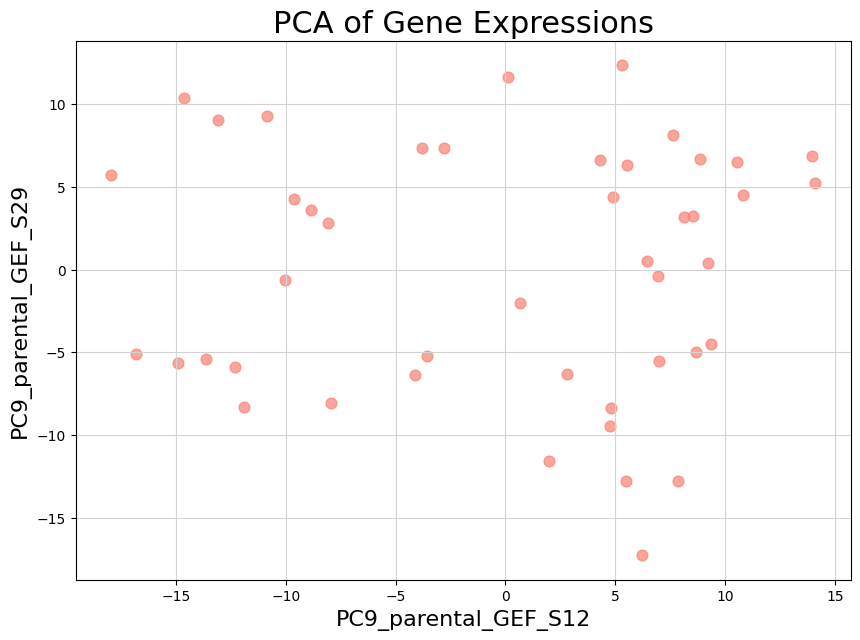

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Load the gene expression data
Gene_drug = pd.read_csv('/content/final_df.csv')

# Exclude the target column (if it exists)
# Adjust this line to match your data, excluding non-numeric columns
data_for_pca = Gene_drug.iloc[:, 2:]  # Assuming columns 0 and 1 are non-numeric (e.g., 'index' and 'Gene')

# Perform PCA on the numerical data
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_for_pca)

# Add the PCA results to the dataframe
Gene_drug['PCA1'] = pca_result[:, 0]
Gene_drug['PCA2'] = pca_result[:, 1]

# Plotting PCA results without hue
plt.figure(figsize=(10, 7))
plt.scatter(Gene_drug['PCA1'], Gene_drug['PCA2'], c='#FA8072', s=60, alpha=0.7)

plt.title('PCA of Gene Expressions', fontsize=22)
plt.xlabel('PC9_parental_GEF_S12', fontsize=16)
plt.ylabel('PC9_parental_GEF_S29', fontsize=16)
plt.grid(color='lightgray')

# Show the plot
plt.show()


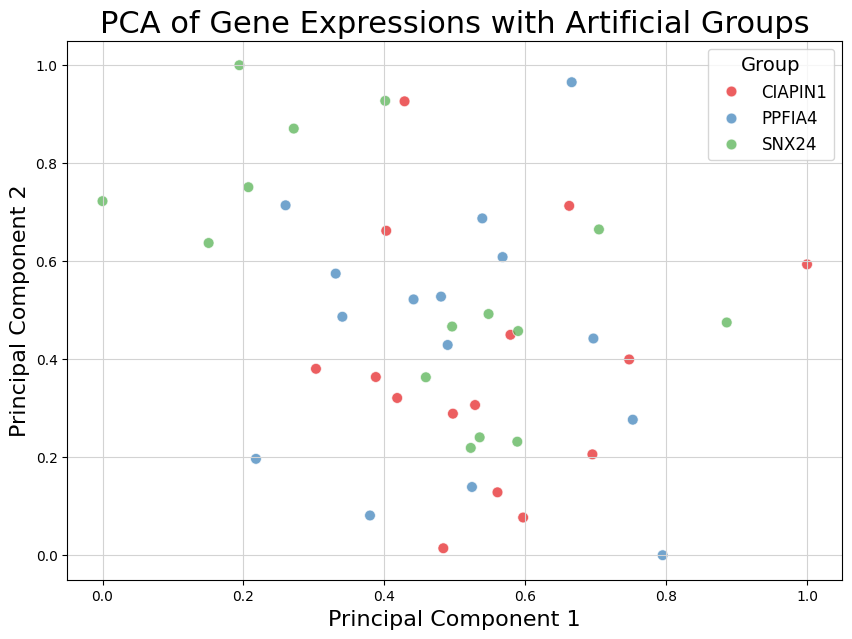

In [8]:
# Example: Create artificial groups based on the index
Gene_drug['Group'] = pd.cut(Gene_drug.index, bins=3, labels=['CIAPIN1', 'PPFIA4', 'SNX24'])

# Plotting PCA results with hue based on the artificial groups
plt.figure(figsize=(10, 7))
sns.scatterplot(x='CIAPIN1', y='PPFIA4', hue='Group', data=Gene_drug, palette='Set1', s=60, alpha=0.7)

plt.title('PCA of Gene Expressions with Artificial Groups', fontsize=22)
plt.xlabel('Principal Component 1', fontsize=16)
plt.ylabel('Principal Component 2', fontsize=16)
plt.legend(title='Group', loc='upper right', fontsize=12, title_fontsize=14)
plt.grid(color='lightgray')

# Show the plot
plt.show()


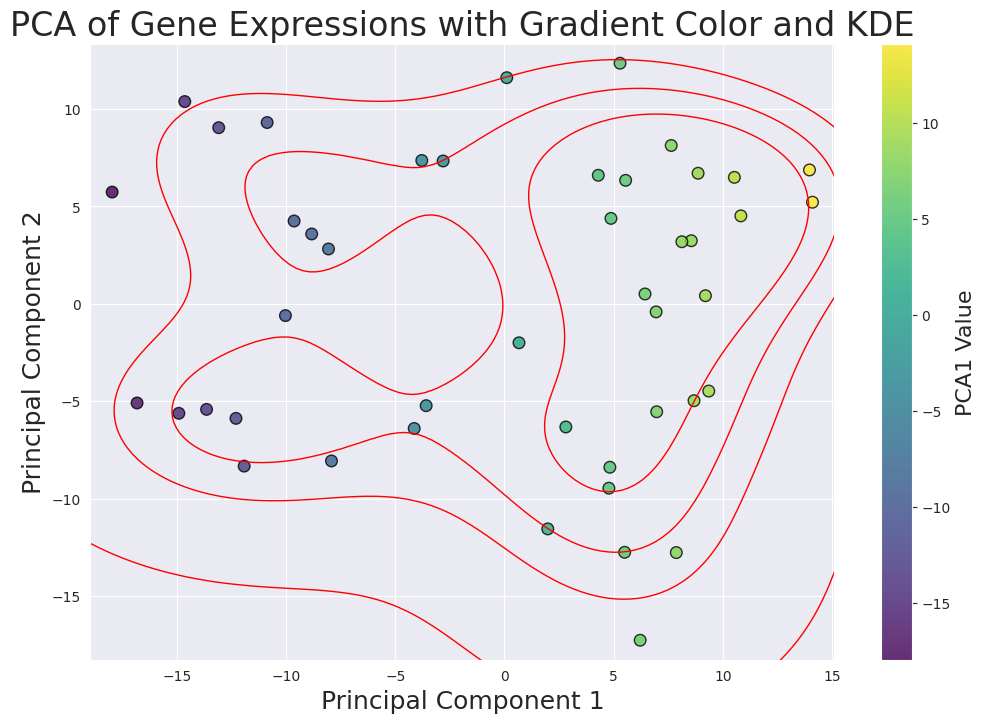

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from matplotlib.colors import Normalize

# Load the gene expression data
Gene_drug = pd.read_csv('/content/final_df.csv')

# Exclude the target column (if it exists)
data_for_pca = Gene_drug.iloc[:, 2:]

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_for_pca)

# Add the PCA results to the dataframe
Gene_drug['PCA1'] = pca_result[:, 0]
Gene_drug['PCA2'] = pca_result[:, 1]

# Normalize PCA1 for color mapping
norm = Normalize(vmin=Gene_drug['PCA1'].min(), vmax=Gene_drug['PCA1'].max())

# Set Seaborn style
# The correct way to apply a Seaborn style is using sns.set_style()
sns.set_style('darkgrid')

# Instead of plt.style.use('seaborn-darkgrid'), use sns.set_style('darkgrid')
# to apply the Seaborn 'darkgrid' style.

plt.figure(figsize=(12, 8))

# Scatter plot with a gradient color
scatter = plt.scatter(Gene_drug['PCA1'], Gene_drug['PCA2'], c=Gene_drug['PCA1'], cmap='viridis', s=70, alpha=0.8, edgecolor='k')

# Add a color bar
cbar = plt.colorbar(scatter)
cbar.set_label('PCA1 Value', fontsize=16)

# Add a KDE plot for density estimation
sns.kdeplot(x=Gene_drug['PCA1'], y=Gene_drug['PCA2'], levels=5, color='r', linewidths=1)

# Titles and labels
plt.title('PCA of Gene Expressions with Gradient Color and KDE', fontsize=24)
plt.xlabel('Principal Component 1', fontsize=18)
plt.ylabel('Principal Component 2', fontsize=18)

# Grid and limits
plt.grid(True)
plt.xlim(Gene_drug['PCA1'].min() - 1, Gene_drug['PCA1'].max() + 1)
plt.ylim(Gene_drug['PCA2'].min() - 1, Gene_drug['PCA2'].max() + 1)

# Show the plot
plt.show()


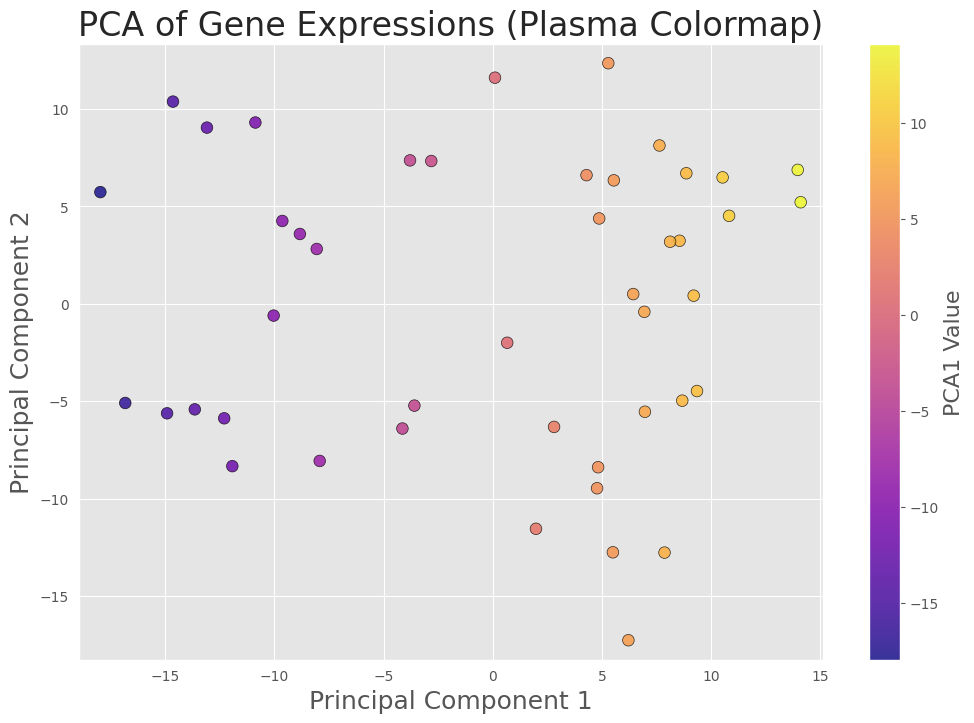

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from matplotlib.colors import Normalize

# Load the gene expression data
Gene_drug = pd.read_csv('/content/final_df.csv')

# Exclude the 'index' column and perform PCA on the remaining columns
data_for_pca = Gene_drug.iloc[:, 1:]  # Assuming 'index' is the first column

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_for_pca)

# Add the PCA results to the dataframe
Gene_drug['PCA1'] = pca_result[:, 0]
Gene_drug['PCA2'] = pca_result[:, 1]

# Normalize PCA1 for color mapping
norm = Normalize(vmin=Gene_drug['PCA1'].min(), vmax=Gene_drug['PCA1'].max())

# Use a stylish plot
plt.style.use('ggplot')
plt.figure(figsize=(12, 8))

# Scatter plot with a gradient color based on PCA1
scatter = plt.scatter(Gene_drug['PCA1'], Gene_drug['PCA2'], c=Gene_drug['PCA1'], cmap='plasma', s=70, alpha=0.8, edgecolor='k')

# Add a color bar
cbar = plt.colorbar(scatter)
cbar.set_label('PCA1 Value', fontsize=16)

# Titles and labels
plt.title('PCA of Gene Expressions (Plasma Colormap)', fontsize=24)
plt.xlabel('Principal Component 1', fontsize=18)
plt.ylabel('Principal Component 2', fontsize=18)

# Grid and limits
plt.grid(True)
plt.xlim(Gene_drug['PCA1'].min() - 1, Gene_drug['PCA1'].max() + 1)
plt.ylim(Gene_drug['PCA2'].min() - 1, Gene_drug['PCA2'].max() + 1)

# Show the plot
plt.show()


In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming Gene_drug is your DataFrame containing gene expression levels
# and target variables (ERLOTINIB and GEFITINIB)

# Split the data into features (X) and target (y) for the desired target
target_column = 'ERLOTINIB'  # or 'GEFITINIB'
X = Gene_drug.drop(columns=['ERLOTINIB', 'GEFITINIB'])
y = Gene_drug[target_column] # Select only the desired target column

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Train a random forest classifier for the selected target
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train) # Fit with the single target

# Calculate permutation importance
results = permutation_importance(rf_model, X_val_scaled, y_val, n_repeats=10, random_state=42)

# ... rest of your code

# Get feature names and their corresponding importance scores
feature_names = X.columns.tolist()
importances = results.importances_mean

# Sort features based on importance scores
sorted_features = sorted(zip(importances, feature_names), reverse=True)

# Select the top 25 features
top_features = [feature[1] for feature in sorted_features[:25]]

print(top_features[:5])
top_features.head()


AttributeError: 'list' object has no attribute 'head'

In [22]:
print("Top 25 Features:")
for i, feature in enumerate(top_features):
    print(f"{i+1}. {feature}")

# Now you can use these top features for PCA analysis or other downstream analyses

Top 25 Features:
1. index
2. ZZZ3
3. ZZEF1
4. ZYX
5. ZYG11B
6. ZYG11A
7. ZXDC
8. ZXDB
9. ZWINT
10. ZWILCH
11. ZSWIM8
12. ZSWIM7
13. ZSWIM6
14. ZSWIM5
15. ZSWIM4
16. ZSWIM3
17. ZSWIM2
18. ZSWIM1
19. ZSCAN9
20. ZSCAN5B
21. ZSCAN5A
22. ZSCAN4
23. ZSCAN32
24. ZSCAN31
25. ZSCAN30


In [27]:
from sklearn.decomposition import PCA

# Apply PCA to the entire dataset
pca = PCA(n_components=min(X_scaled.shape[0], X_scaled.shape[1]))  # Set n_components to the minimum
# or you can explicitly set it to 45:
# pca = PCA(n_components=45)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame with the PCA results
pca_columns = [f'PC{i+1}' for i in range(X_pca.shape[1])]
X_pca_df = pd.DataFrame(X_pca, columns=pca_columns)

print(f"Original number of features: {X_scaled.shape[1]}")
print(f"Reduced number of features after PCA: {X_pca.shape[1]}")

# Show the first few rows of the PCA-reduced feature set
print(X_pca_df.head())


Original number of features: 48
Reduced number of features after PCA: 45
         PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  23.123521  0.615655 -0.244372 -0.033494 -0.270314  0.347331 -0.222559   
1   0.517136  0.034422 -0.174110 -1.113871  1.201485 -1.362234 -1.995502   
2  -1.306478  5.596862 -0.628935  1.934953 -0.456909 -0.077070  1.109616   
3  -0.796554  3.521642 -0.625277  1.104618 -1.011942  0.141196  0.133190   
4  -0.970126  5.919278 -0.600941  2.484021 -1.073261  0.151360  1.083651   

        PC8       PC9      PC10  ...      PC36      PC37      PC38      PC39  \
0  0.214517 -0.320124 -0.048834  ...  0.000519 -0.002406  0.008196 -0.000353   
1  0.729071 -0.006649 -0.331071  ... -0.061038 -0.212139  0.037545 -0.042560   
2  0.779898  0.129032 -0.570039  ... -0.019898 -0.050454  0.052669  0.102094   
3 -0.851208  0.252153  0.519843  ... -0.151635  0.036997 -0.021425 -0.028841   
4 -0.958629  0.218881  1.550981  ...  0.119077  0.055556 -0.135251 -0.

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Convert categorical target to binary
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Train the classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_scaled, y_encoded)
# Feature importance
importances = clf.feature_importances_

# Check the shape of importances and X.columns
print(f"Shape of importances: {importances.shape}")
print(f"Number of features in X: {X.shape[1]}")

feature_importance_df = pd.DataFrame({
    'Feature': X.columns[:len(importances)], # Use only the relevant features
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Select top N important features
top_features = feature_importance_df.head(50)['Feature'].values
print(f"Top features based on RandomForest importance: {top_features}")

Shape of importances: (48,)
Number of features in X: 16517
Top features based on RandomForest importance: ['PC9_parental_GEF_S18' 'PC9_parental_GEF_S28' 'PC9_parental_GEF_S34'
 'PC9_parental_GEF_S14' 'PC9_parental_GEF_S23' 'PC9_parental_GEF_S4'
 'PC9_parental_GEF_S38' 'PC9_parental_GEF_S20' 'PC9_parental_GEF_S17'
 'PC9_parental_GEF_S35' 'PC9_G3_early_S5' 'PC9_parental_GEF_S30'
 'PC9_G3_early_S40' 'PC9_parental_GEF_S19' 'PC9_parental_GEF_S9'
 'PC9_parental_GEF_S2' 'PC9_parental_GEF_S22' 'PC9_parental_GEF_S33'
 'PC9_parental_GEF_S10' 'PC9_parental_GEF_S37' 'PC9_parental_GEF_S3'
 'PC9_parental_GEF_S7' 'PC9_G3_early_S48' 'PC9_parental_GEF_S1'
 'PC9_G3_early_S24' 'PC9_parental_GEF_S8' 'PC9_parental_GEF_S39'
 'PC9_G3_early_S39' 'PC9_G3_early_S55' 'PC9_parental_GEF_S5'
 'PC9_parental_GEF_S24' 'PC9_parental_GEF_S11' 'PC9_G3_early_S41'
 'PC9_parental_GEF_S29' 'PC9_G3_early_S33' 'PC9_parental_GEF_S27'
 'PC9_parental_GEF_S26' 'PC9_parental_GEF_S15' 'PC9_G3_early_S43'
 'PC9_parental_GEF_S21' 'PC9_

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'feature_importance_df' is already created
top_features = feature_importance_df.sort_values('Importance', ascending=False).head(20)['Feature'].tolist()
importances = feature_importance_df.sort_values('Importance', ascending=False).head(20)['Importance'].tolist()


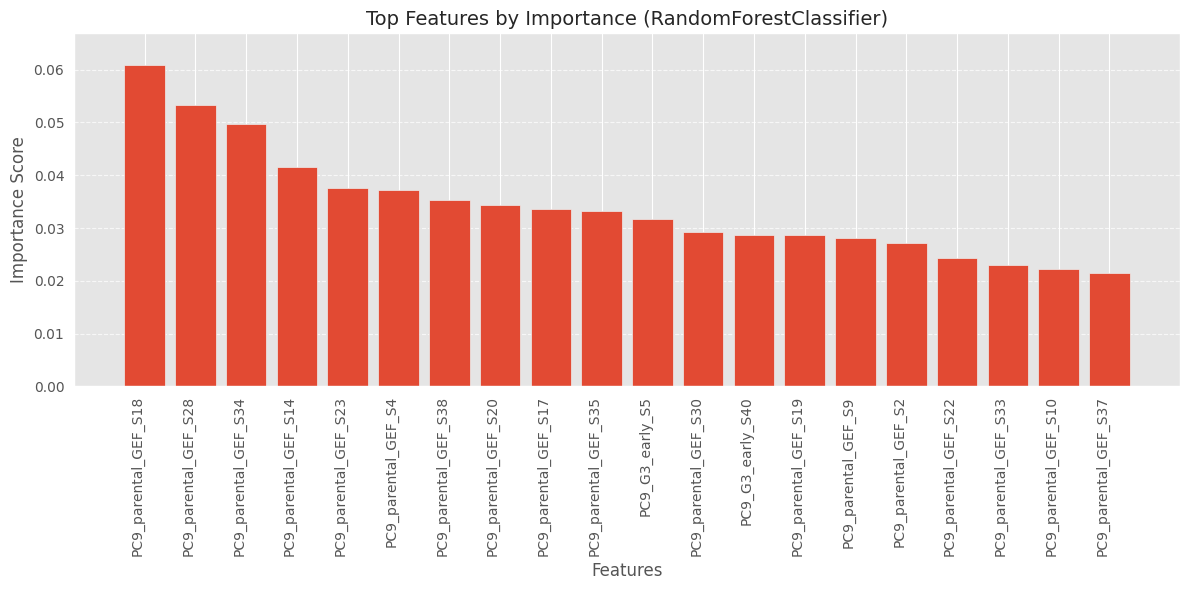

In [32]:
# Create the figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Set the x-axis ticks and labels
ax.set_xticks(range(len(top_features)))
ax.set_xticklabels(top_features, rotation=90, ha='right')

# Set the title and labels
ax.set_title('Top Features by Importance (RandomForestClassifier)', fontsize=14)
ax.set_xlabel('Features', fontsize=12)
ax.set_ylabel('Importance Score', fontsize=12)

# Set the y-axis limits
ax.set_ylim([0, max(importances)*1.1])

# Create the bar plot
ax.bar(range(len(importances)), importances, width=0.8)

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


In [34]:
import pandas as pd

# Load the gene expression data
Gene_drug = pd.read_csv('/content/final_df.csv')

# List of top features
top_features = ['PLP1', 'ESM1', 'PRSS1', 'SERPINB3', 'PHOX2B', 'KRT6A', 'ROBO2', 'index', 'CYTIP',
                 'PASD1', 'GEFITINIB', 'IKZF1', 'SLC1A6', 'COL1A1', 'IGLL1', 'MYCN', 'FGB',
                 'CDH17', 'HLA-DQA1', 'CHRNA3', 'PLEK', 'TNFRSF17', 'GCSAM', 'SLC45A2', 'SASH3',
                 'AMER2', 'ELF5', 'TM4SF4', 'LCP2', 'CALCA', 'SLC44A4', 'P2RY10', 'PTPRC', 'OLR1',
                 'KCNA1', 'ADH1C', 'GABRP', 'TYR', 'ITGAL', 'UGT3A2', 'GPR18', 'CPN1', 'UPK1B',
                 'INSM2', 'SYCP1', 'STAP1', 'DPP6', 'RGS18', 'CXCL5', 'ITM2A']

# Exclude the 'index' column if it's not relevant
top_features = [feature for feature in top_features if feature != 'index']

# Filter the data
X_top_features = Gene_drug[top_features]


In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming feature_importance_df is already created
top_features = feature_importance_df.head(50)['Feature'].values
top_importances = feature_importance_df.head(50)['Importance'].values

# Create a DataFrame for top features and their importance
top_features_df = pd.DataFrame({
    'Feature': top_features,
    'Importance': top_importances
})


In [37]:
# Save the DataFrame to a CSV file
top_features_df.to_csv('/kaggle/working/top_features_importance.csv', index=False)


OSError: Cannot save file into a non-existent directory: '/kaggle/working'

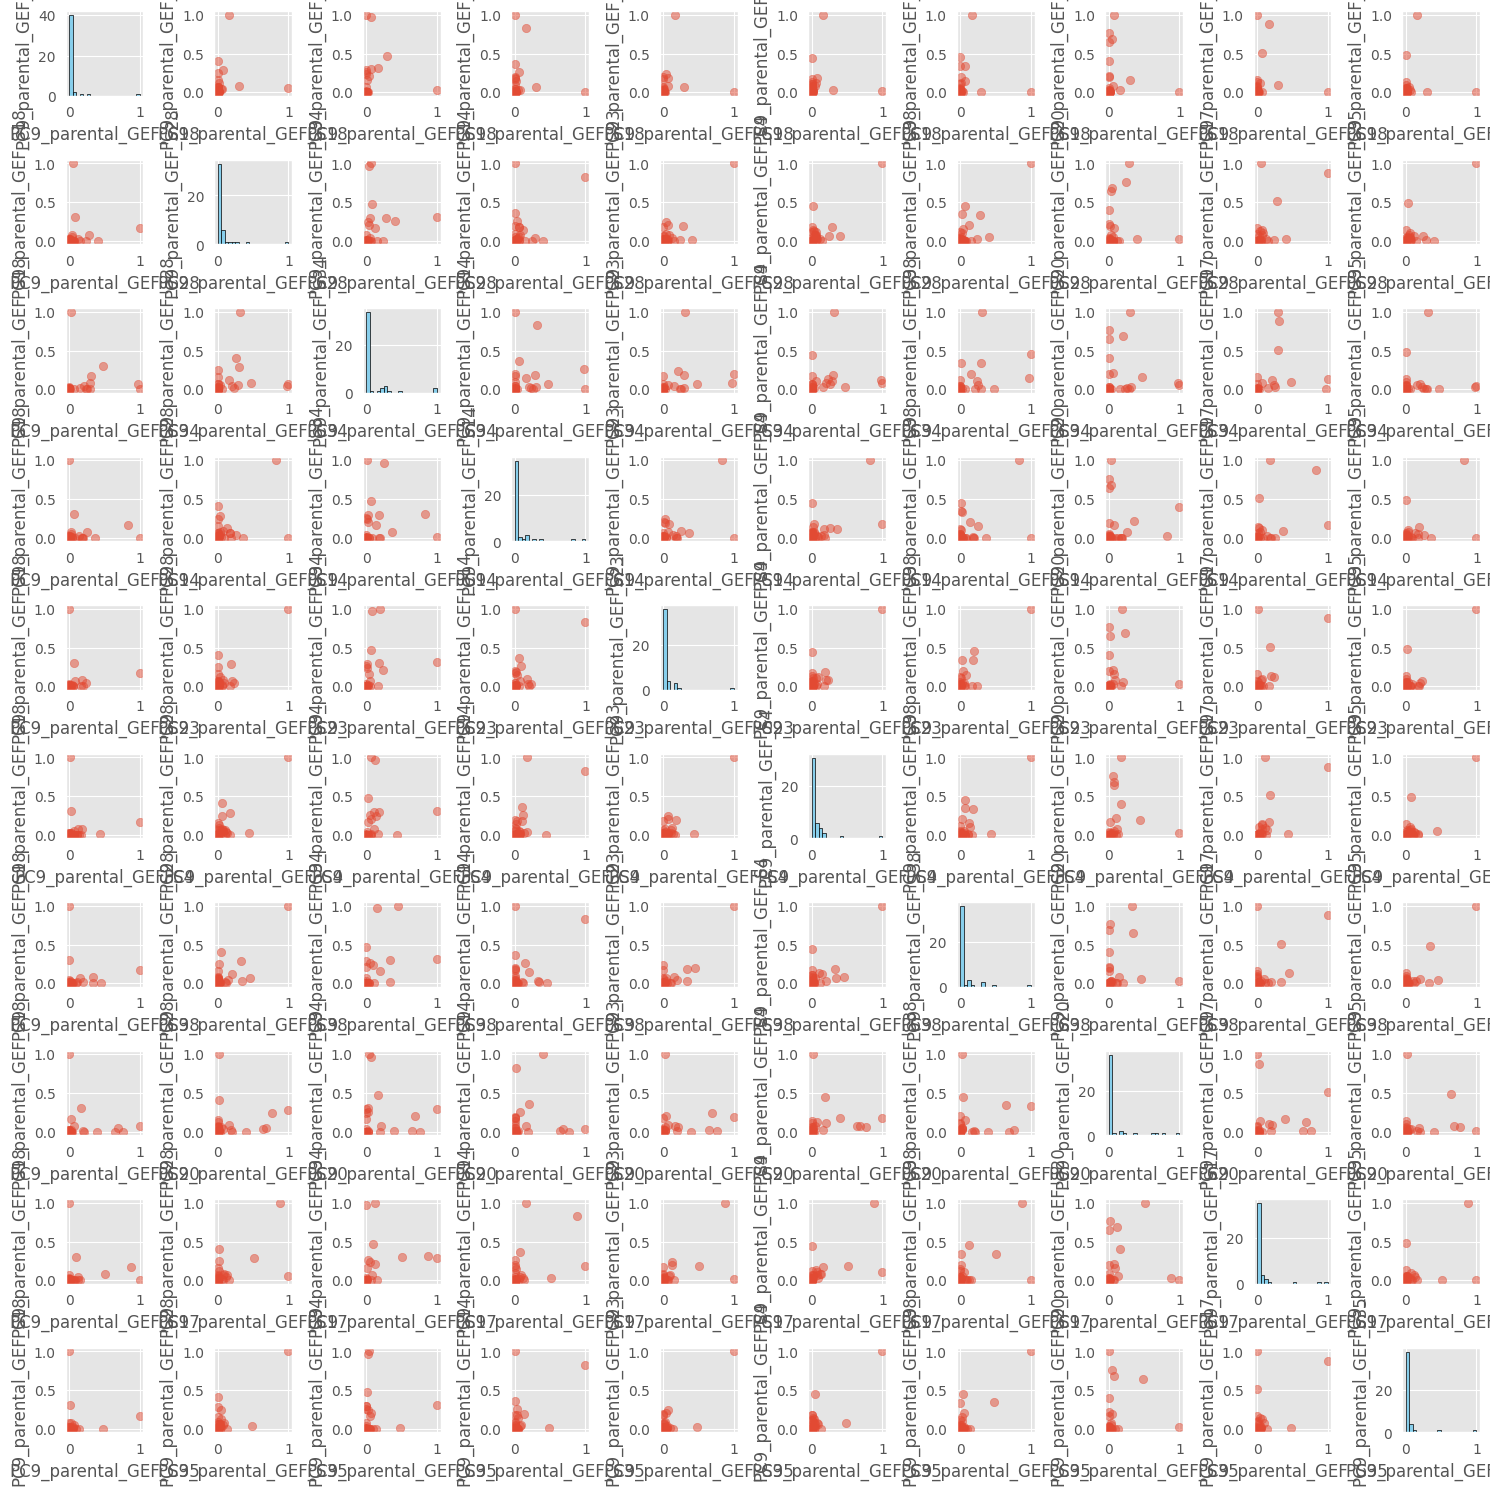

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define a smaller subset of top features for visualization
subset_features = top_features[:10]  # Select a smaller subset (e.g., the top 10 features)

# Create a DataFrame for scatter plot
scatter_data = Gene_drug[subset_features]

# Plot pairwise scatter plots
n_features = len(subset_features)
fig, axes = plt.subplots(nrows=n_features, ncols=n_features, figsize=(15, 15))

for i in range(n_features):
    for j in range(n_features):
        if i == j:
            axes[i, j].hist(scatter_data[subset_features[i]], bins=20, color='skyblue', edgecolor='black')
            axes[i, j].set_xlabel(subset_features[i])
            axes[i, j].set_ylabel(subset_features[j])
        else:
            axes[i, j].scatter(scatter_data[subset_features[i]], scatter_data[subset_features[j]], alpha=0.5)
            axes[i, j].set_xlabel(subset_features[i])
            axes[i, j].set_ylabel(subset_features[j])
        axes[i, j].grid(True)

plt.tight_layout()
plt.show()


In [39]:
top_features_df.head()

Feature  Importance
0  PC9_parental_GEF_S18    0.060798
1  PC9_parental_GEF_S28    0.053327
2  PC9_parental_GEF_S34    0.049671
3  PC9_parental_GEF_S14    0.041551
4  PC9_parental_GEF_S23    0.037505

<ipython-input-43-89936287231b>:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('plasma')


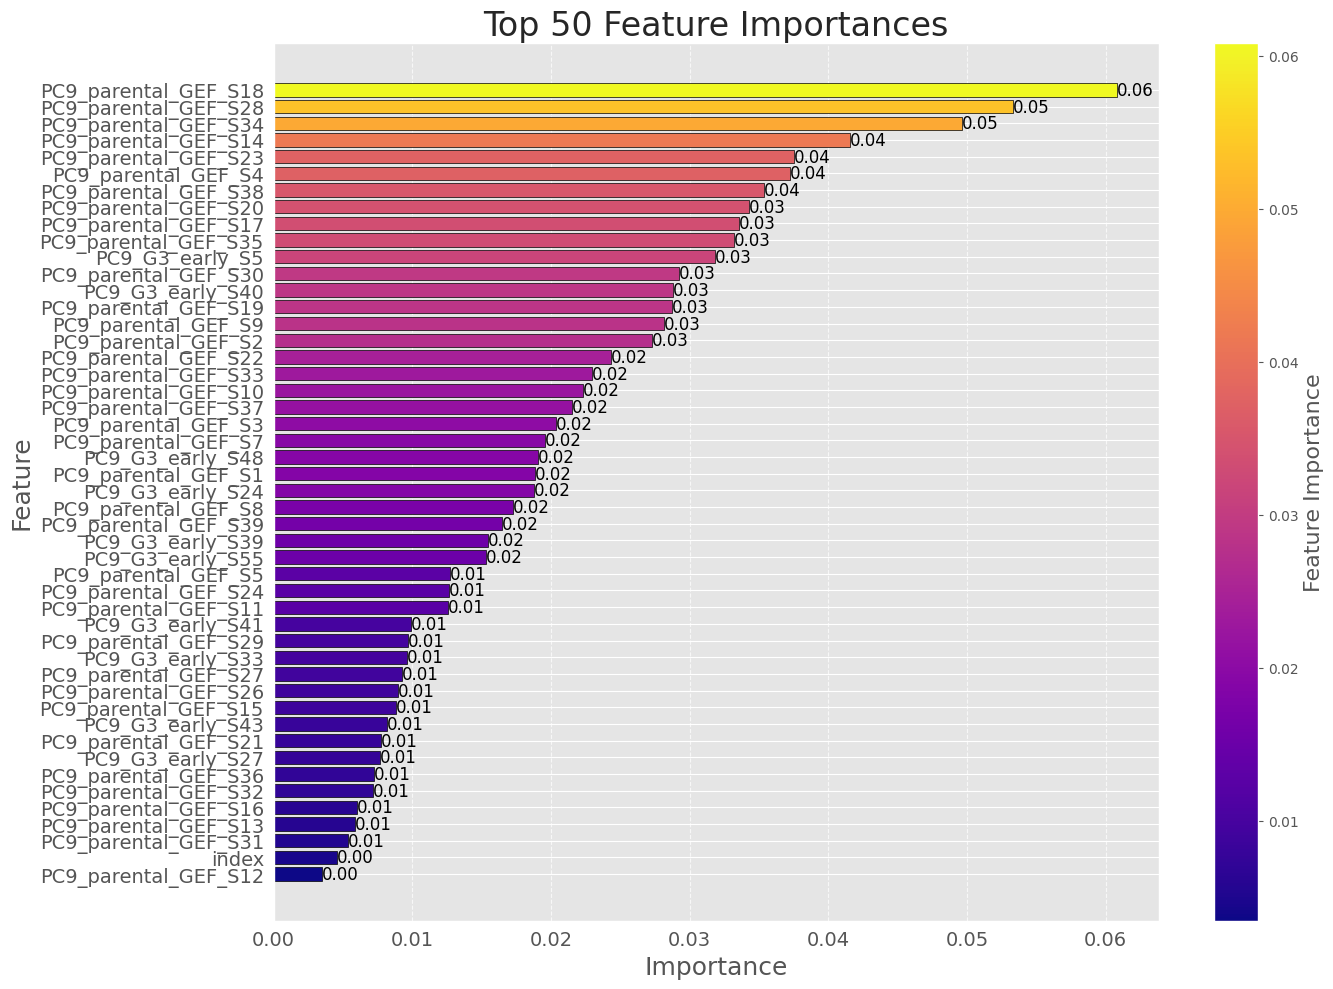

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import Normalize
from matplotlib.cm import get_cmap

# Assuming feature_importance_df is already created with 'Feature' and 'Importance'
# Extract the top features and their importances
top_features = feature_importance_df.head(50)['Feature'].values
top_importances = feature_importance_df.head(50)['Importance'].values

# Create a DataFrame for top features and their importance
top_features_df = pd.DataFrame({
    'Feature': top_features,
    'Importance': top_importances
})

# Sort the DataFrame by importance
top_features_df = top_features_df.sort_values(by='Importance', ascending=True)

# Normalize importance for color mapping
norm = Normalize(vmin=top_features_df['Importance'].min(), vmax=top_features_df['Importance'].max())
cmap = get_cmap('plasma')
# Plot
fig, ax = plt.subplots(figsize=(14, 10))  # Create a figure and axes

# Create horizontal bar plot with color gradient
bars = ax.barh(top_features_df['Feature'], top_features_df['Importance'],  # Use ax.barh
                color=cmap(norm(top_features_df['Importance'])), edgecolor='k')


# Add color bar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label('Feature Importance', fontsize=16)

# Titles and labels
plt.title('Top 50 Feature Importances', fontsize=24)
plt.xlabel('Importance', fontsize=18)
plt.ylabel('Feature', fontsize=18)

# Customize ticks and grid
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Add value labels on bars
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, f'{width:.2f}',
             va='center', ha='left', fontsize=12, color='black')

plt.tight_layout()
plt.show()


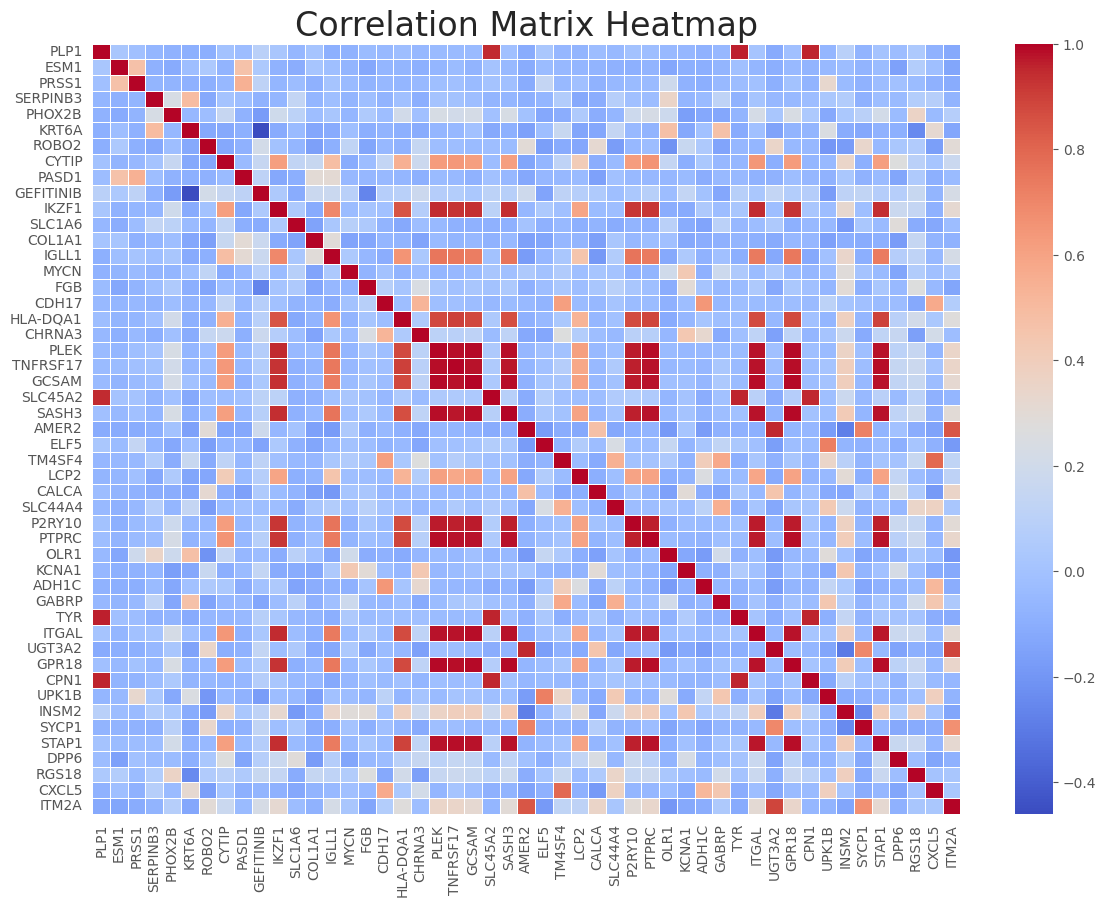

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
correlation_matrix = X_top_features.corr()

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt='.1f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap', fontsize=24)
plt.show()


<ipython-input-45-49c2624c3a43>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scatter_data[target_column] = Gene_drug[target_column]


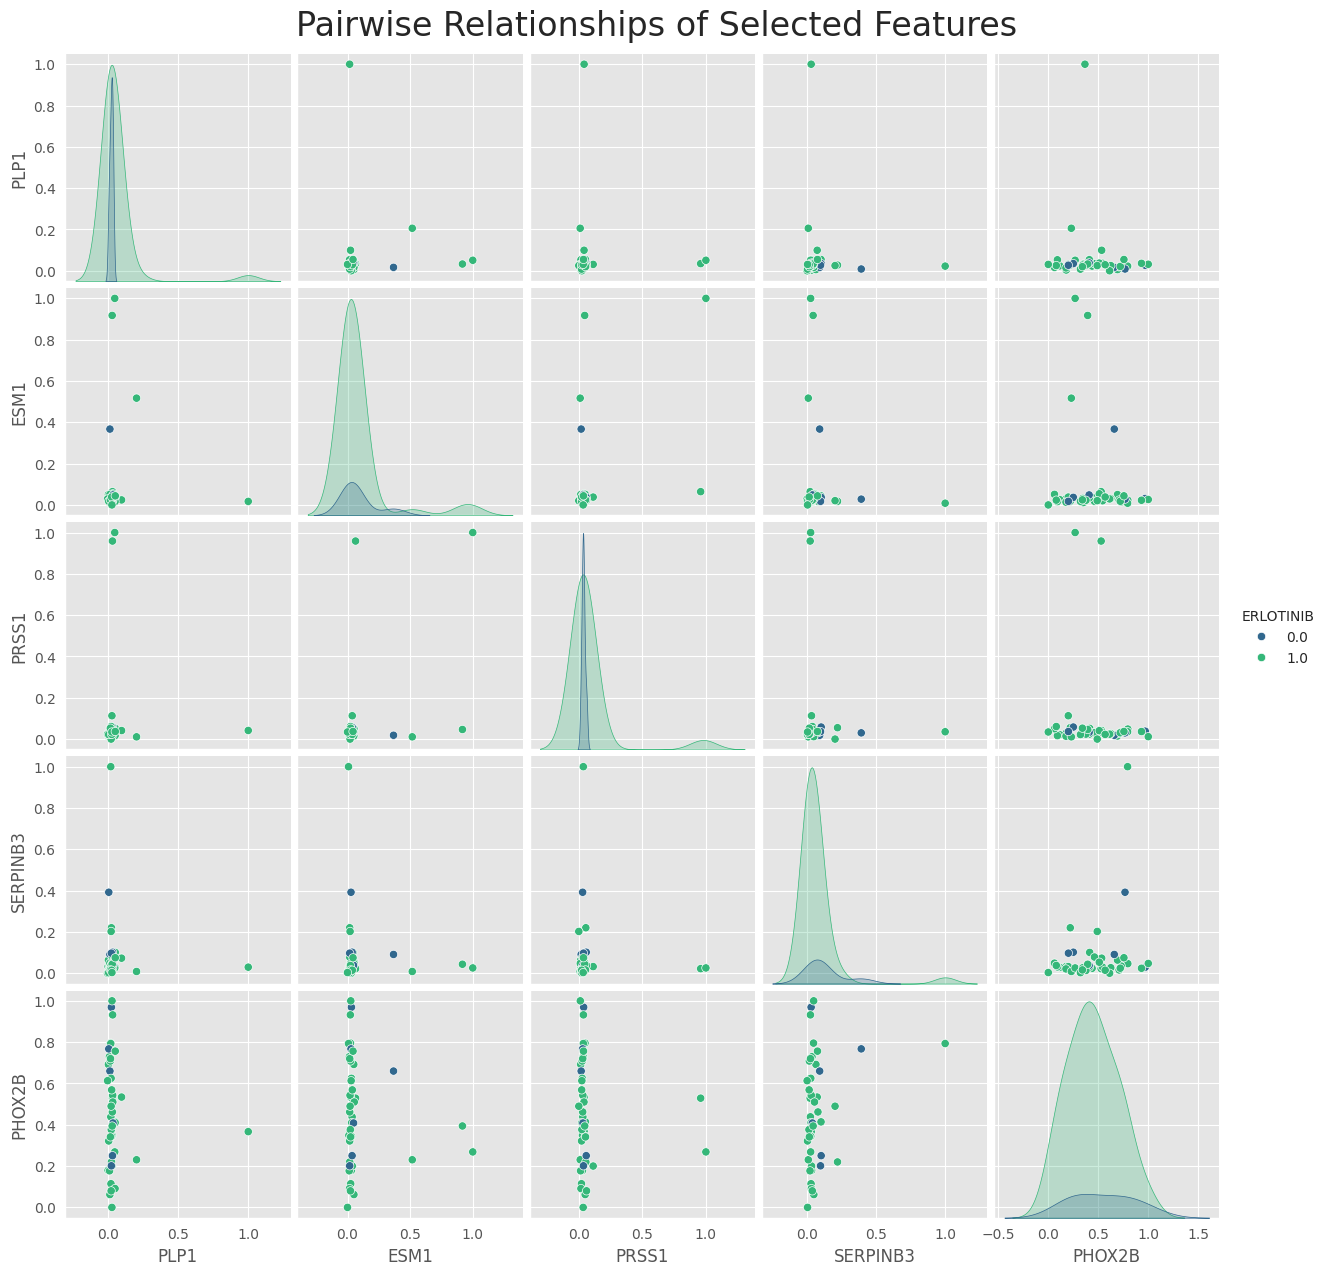

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sample subset of features for clarity
features_subset = ['PLP1', 'ESM1', 'PRSS1', 'SERPINB3', 'PHOX2B']

# Create a DataFrame for scatter plots
scatter_data = X_top_features[features_subset]
scatter_data[target_column] = Gene_drug[target_column]

# Plot pairwise scatter plots
sns.pairplot(scatter_data, hue=target_column, palette='viridis')
plt.suptitle('Pairwise Relationships of Selected Features', y=1.02, fontsize=24)
plt.show()


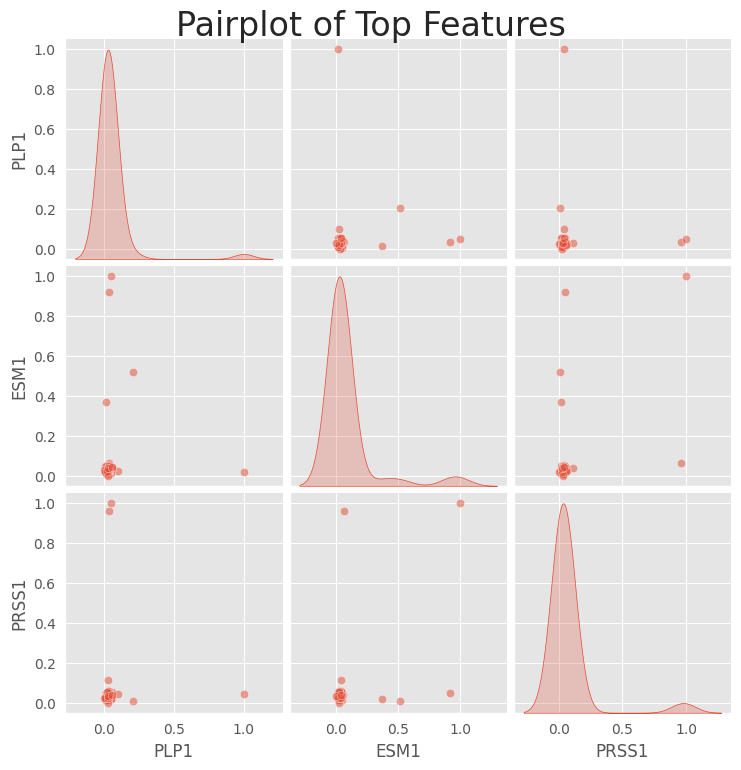

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure subset_features are actually in X_top_features
subset_features = list(X_top_features.columns[:3])  # Get the first 3 features from X_top_features

# Create a DataFrame for scatter plots
subset_data = X_top_features.loc[:, subset_features]

# Pairplot
sns.pairplot(subset_data, plot_kws={'alpha':0.5}, diag_kind='kde')
plt.suptitle('Pairplot of Top Features', y=1.02, fontsize=24)
plt.show()

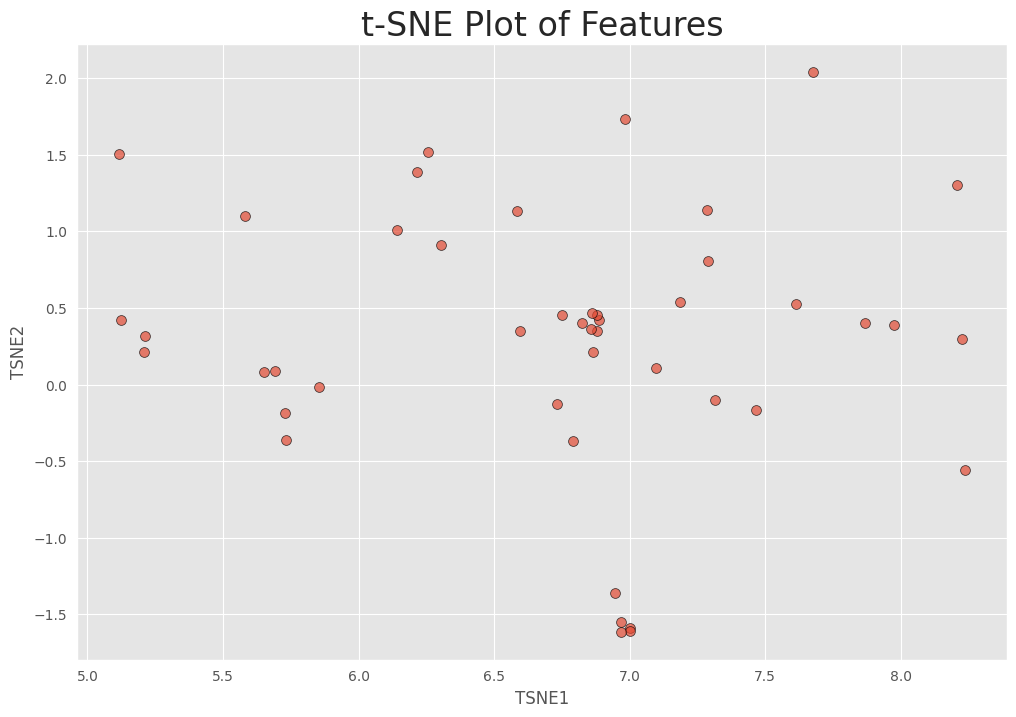

In [51]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Perform t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(X_top_features)

# Create a DataFrame for t-SNE results
tsne_df = pd.DataFrame(tsne_result, columns=['TSNE1', 'TSNE2'])

# Plot t-SNE
plt.figure(figsize=(12, 8))
sns.scatterplot(x='TSNE1', y='TSNE2', data=tsne_df, alpha=0.7, s=50, edgecolor='k')
plt.title('t-SNE Plot of Features', fontsize=24)
plt.show()


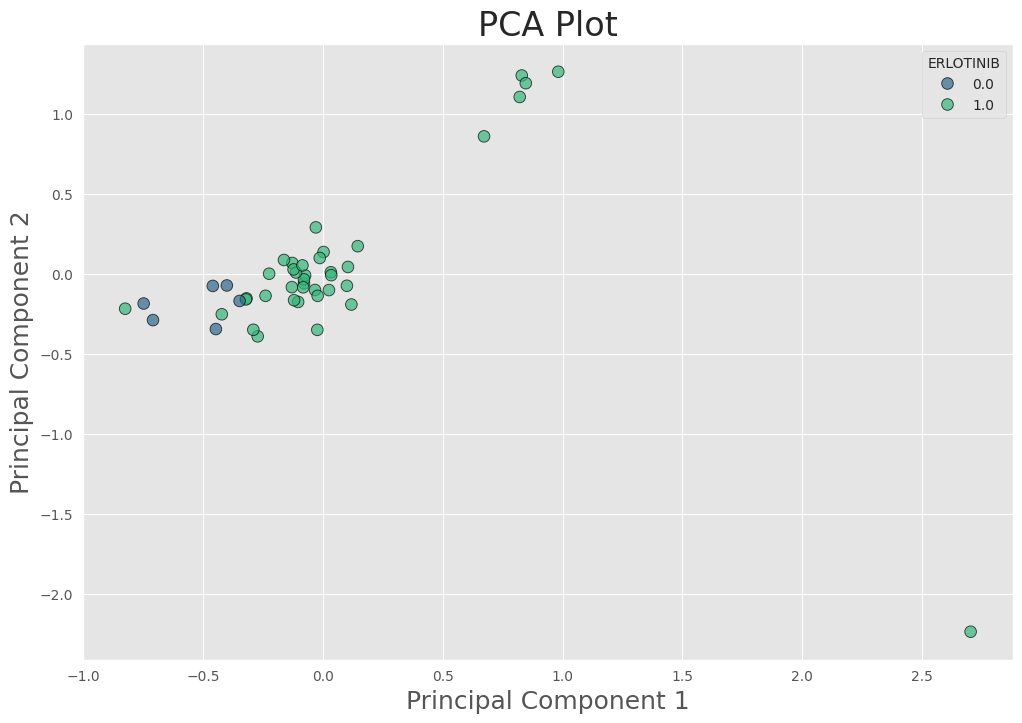

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Load the gene expression data
Gene_drug = pd.read_csv('/content/final_df.csv')

# List of top features (excluding 'index')
top_features = ['PLP1', 'ESM1', 'PRSS1', 'SERPINB3', 'PHOX2B', 'KRT6A', 'ROBO2', 'CYTIP',
                 'PASD1', 'GEFITINIB', 'IKZF1', 'SLC1A6', 'COL1A1', 'IGLL1', 'MYCN', 'FGB',
                 'CDH17', 'HLA-DQA1', 'CHRNA3', 'PLEK', 'TNFRSF17', 'GCSAM', 'SLC45A2', 'SASH3',
                 'AMER2', 'ELF5', 'TM4SF4', 'LCP2', 'CALCA', 'SLC44A4', 'P2RY10', 'PTPRC', 'OLR1',
                 'KCNA1', 'ADH1C', 'GABRP', 'TYR', 'ITGAL', 'UGT3A2', 'GPR18', 'CPN1', 'UPK1B',
                 'INSM2', 'SYCP1', 'STAP1', 'DPP6', 'RGS18', 'CXCL5', 'ITM2A']

# Exclude 'index' column if it's not relevant
top_features = [feature for feature in top_features if feature != 'index']

# Filter the data
X_top_features = Gene_drug[top_features]

# Define the target column
target_column = 'ERLOTINIB'  # Replace with the actual target column name

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_top_features)

# Create a DataFrame for PCA results
pca_df = pd.DataFrame(pca_result, columns=['PCA1', 'PCA2'])

# Add the target column to the DataFrame
pca_df[target_column] = Gene_drug[target_column]

# Plot PCA results with target overlay
plt.figure(figsize=(12, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue=target_column, data=pca_df, palette='viridis', s=70, alpha=0.7, edgecolor='k')
plt.title('PCA Plot', fontsize=24)
plt.xlabel('Principal Component 1', fontsize=18)
plt.ylabel('Principal Component 2', fontsize=18)
plt.legend(title=target_column)
plt.grid(True)
plt.show()


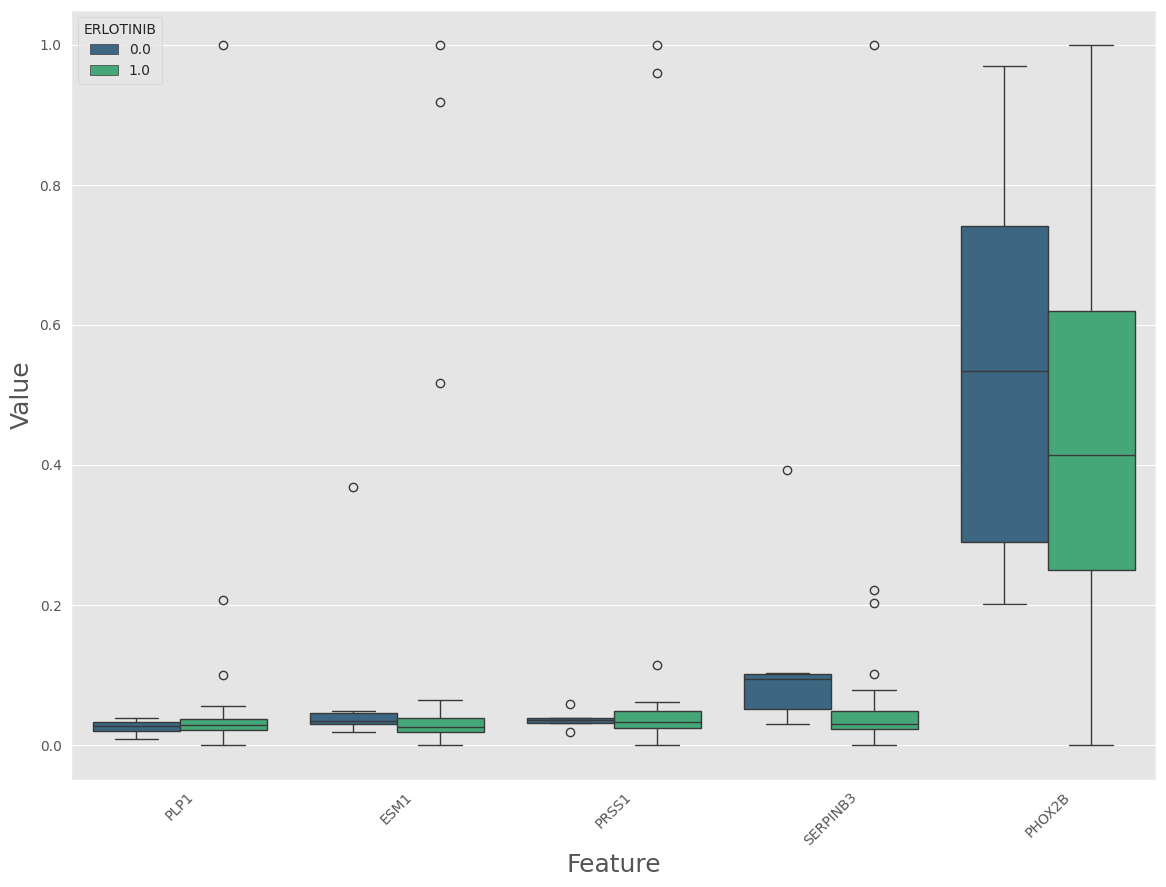

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame for boxplot
boxplot_data = X_top_features.copy()
boxplot_data[target_column] = Gene_drug[target_column]

# Sample subset of features for boxplot
features_subset = ['PLP1', 'ESM1', 'PRSS1', 'SERPINB3', 'PHOX2B']

# Melt the DataFrame for easy plotting
boxplot_melted = pd.melt(boxplot_data, id_vars=[target_column], value_vars=features_subset)

# Plot boxplot
plt.figure(figsize=(14, 10))
sns.boxplot(x='variable', y='value', hue=target_column, data=boxplot_melted, palette='viridis')
plt.xlabel('Feature', fontsize=18)
plt.ylabel('Value', fontsize=18)
plt.xticks(rotation=45)
plt.show()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.3 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


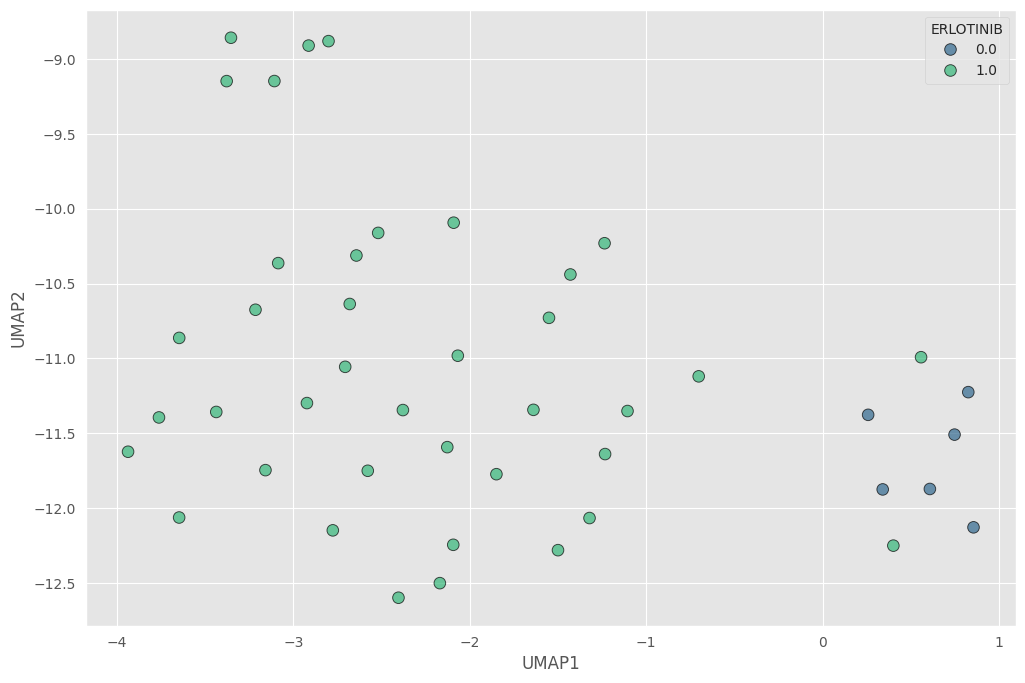

In [56]:
!pip install umap-learn
import umap
import seaborn as sns
import matplotlib.pyplot as plt

# Perform UMAP
umap_model = umap.UMAP(n_components=2, random_state=42)
umap_result = umap_model.fit_transform(X_top_features)

# Create a DataFrame for UMAP results
umap_df = pd.DataFrame(umap_result, columns=['UMAP1', 'UMAP2'])
umap_df[target_column] = Gene_drug[target_column]

# Plot UMAP results
plt.figure(figsize=(12, 8))
sns.scatterplot(x='UMAP1', y='UMAP2', hue=target_column, data=umap_df, palette='viridis', s=70, alpha=0.7, edgecolor='k')
#plt.title('UMAP Plot', fontsize=24)
plt.show()


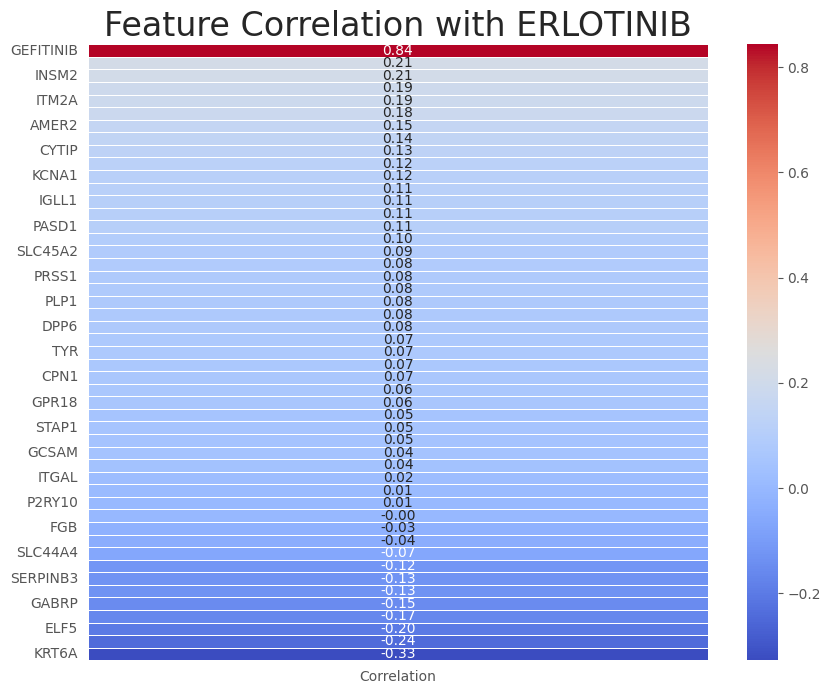

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation of features with the target variable
target_correlation = X_top_features.corrwith(Gene_drug[target_column])

# Create a DataFrame for the heatmap
target_correlation_df = pd.DataFrame(target_correlation, columns=['Correlation'])
target_correlation_df = target_correlation_df.sort_values(by='Correlation', ascending=False)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(target_correlation_df, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title(f'Feature Correlation with {target_column}', fontsize=24)
plt.show()


<ipython-input-58-415db4f9ff03>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scatter_data[target_column] = Gene_drug[target_column]


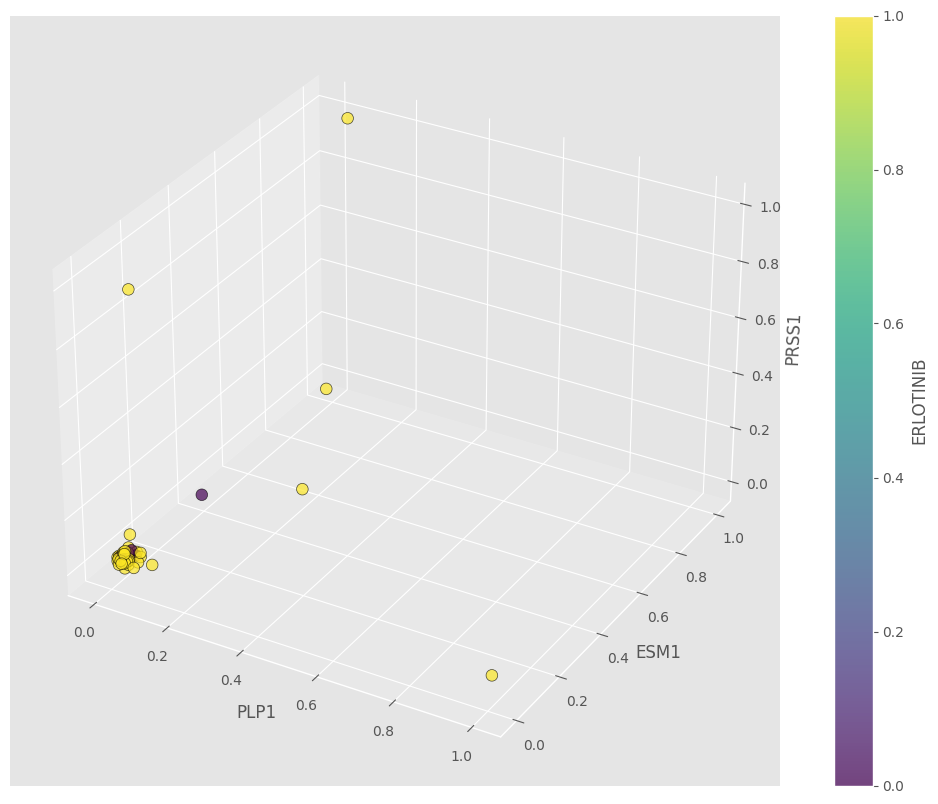

In [58]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Sample subset of features for 3D plot
features_subset = ['PLP1', 'ESM1', 'PRSS1']

# Create a DataFrame for 3D scatter plot
scatter_data = X_top_features[features_subset]
scatter_data[target_column] = Gene_drug[target_column]

# Plot 3D scatter plot
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(scatter_data[features_subset[0]], scatter_data[features_subset[1]], scatter_data[features_subset[2]],
                c=scatter_data[target_column], cmap='viridis', s=70, alpha=0.7, edgecolor='k')

# Labels and title
ax.set_xlabel(features_subset[0])
ax.set_ylabel(features_subset[1])
ax.set_zlabel(features_subset[2])
#plt.title('3D Scatter Plot of Selected Features', fontsize=24)
plt.colorbar(sc, label=target_column)
plt.show()


# Define targets
'ERLOTINIB'
'GEFITINIB'

In [59]:
import pandas as pd
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler

# Load the gene expression data
Gene_drug = pd.read_csv('/content/final_df.csv')

# Define targets
target_column_1 = 'ERLOTINIB'
target_column_2 = 'GEFITINIB'

# Separate features and target variables
X = Gene_drug.drop(columns=[target_column_1, target_column_2])
y1 = Gene_drug[target_column_1]
y2 = Gene_drug[target_column_2]


In [60]:
# Remove low-variance features
selector = VarianceThreshold()
X_high_variance = selector.fit_transform(X)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_high_variance)


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pairwise plots for ERLOTINIB
sns.pairplot(Gene_drug[['ERLOTINIB'] + list(X.columns)], hue='ERLOTINIB', palette='viridis')
plt.title('Pairwise Plots for ERLOTINIB', fontsize=24)
plt.show()

# Pairwise plots for GEFITINIB
sns.pairplot(Gene_drug[['GEFITINIB'] + list(X.columns)], hue='GEFITINIB', palette='plasma')
plt.title('Pairwise Plots for GEFITINIB', fontsize=24)
plt.show()


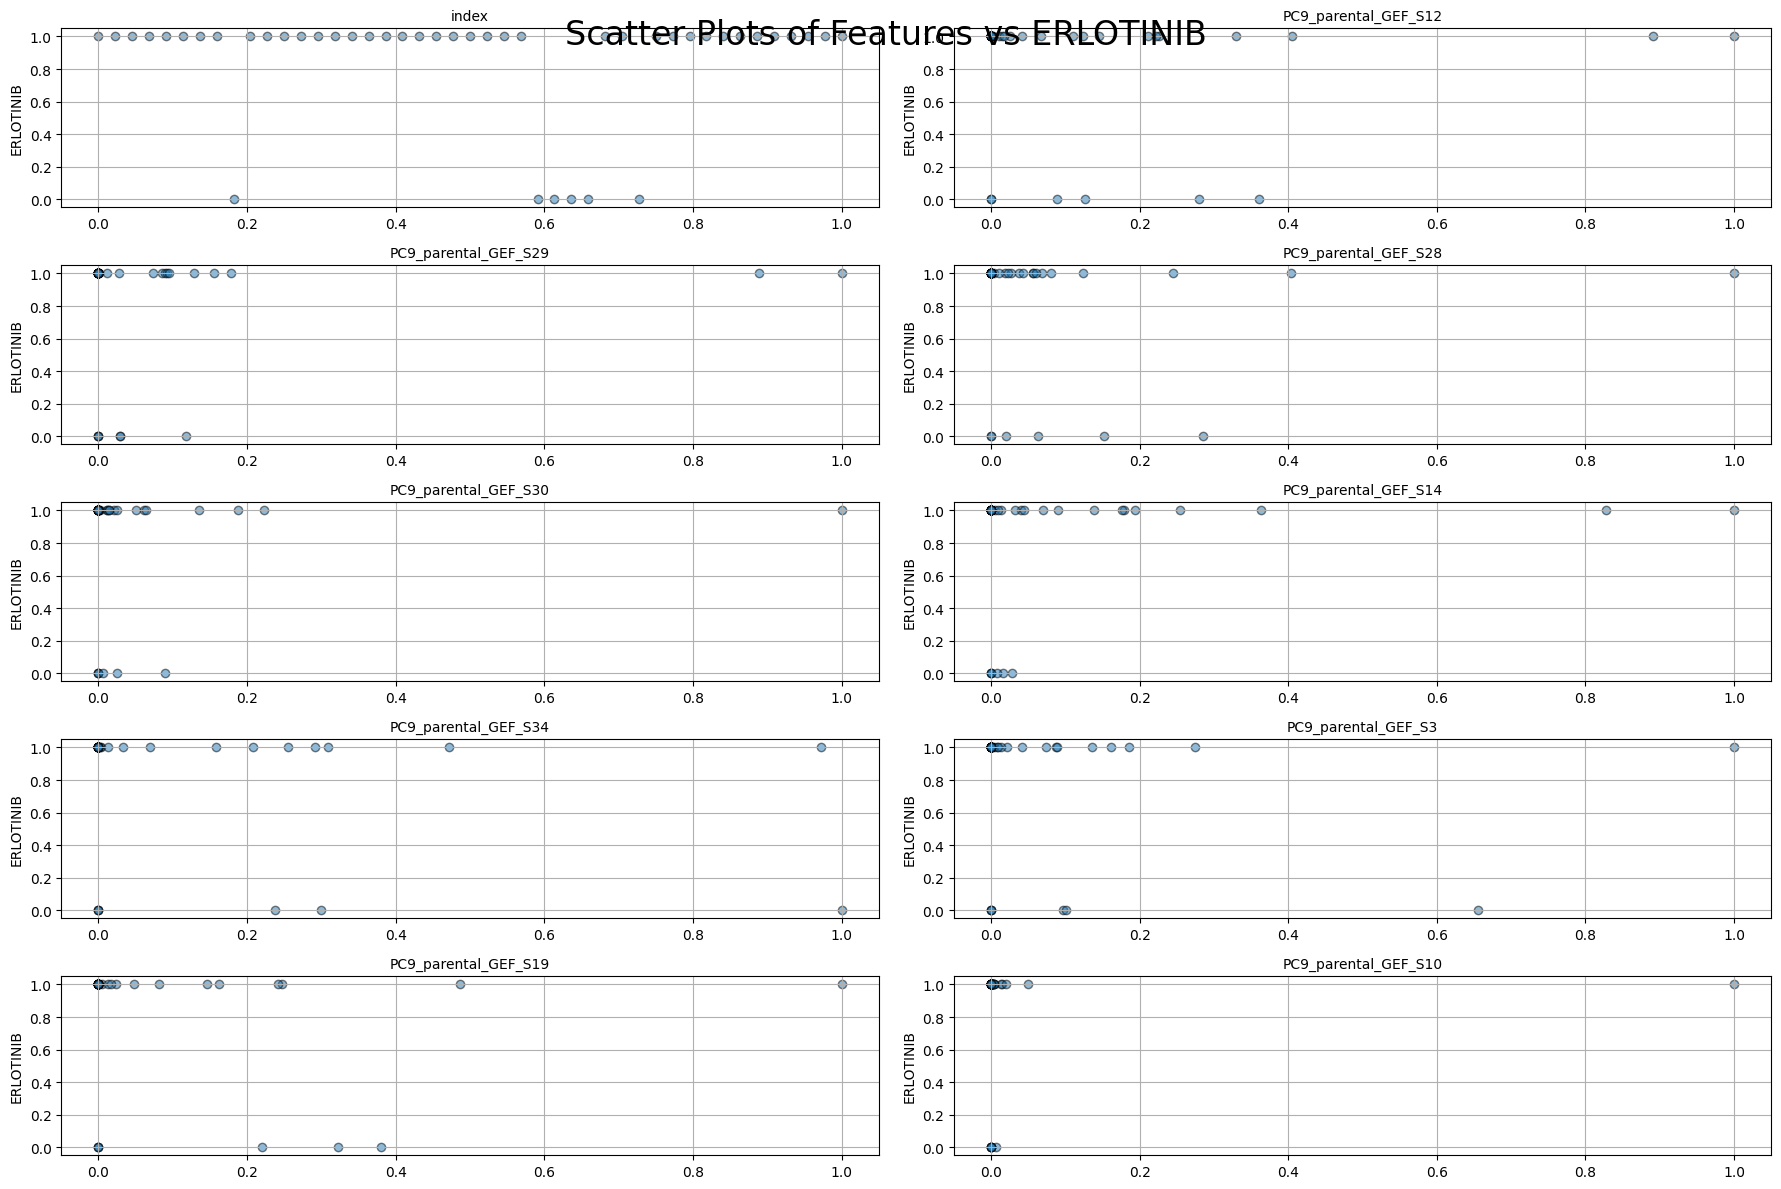

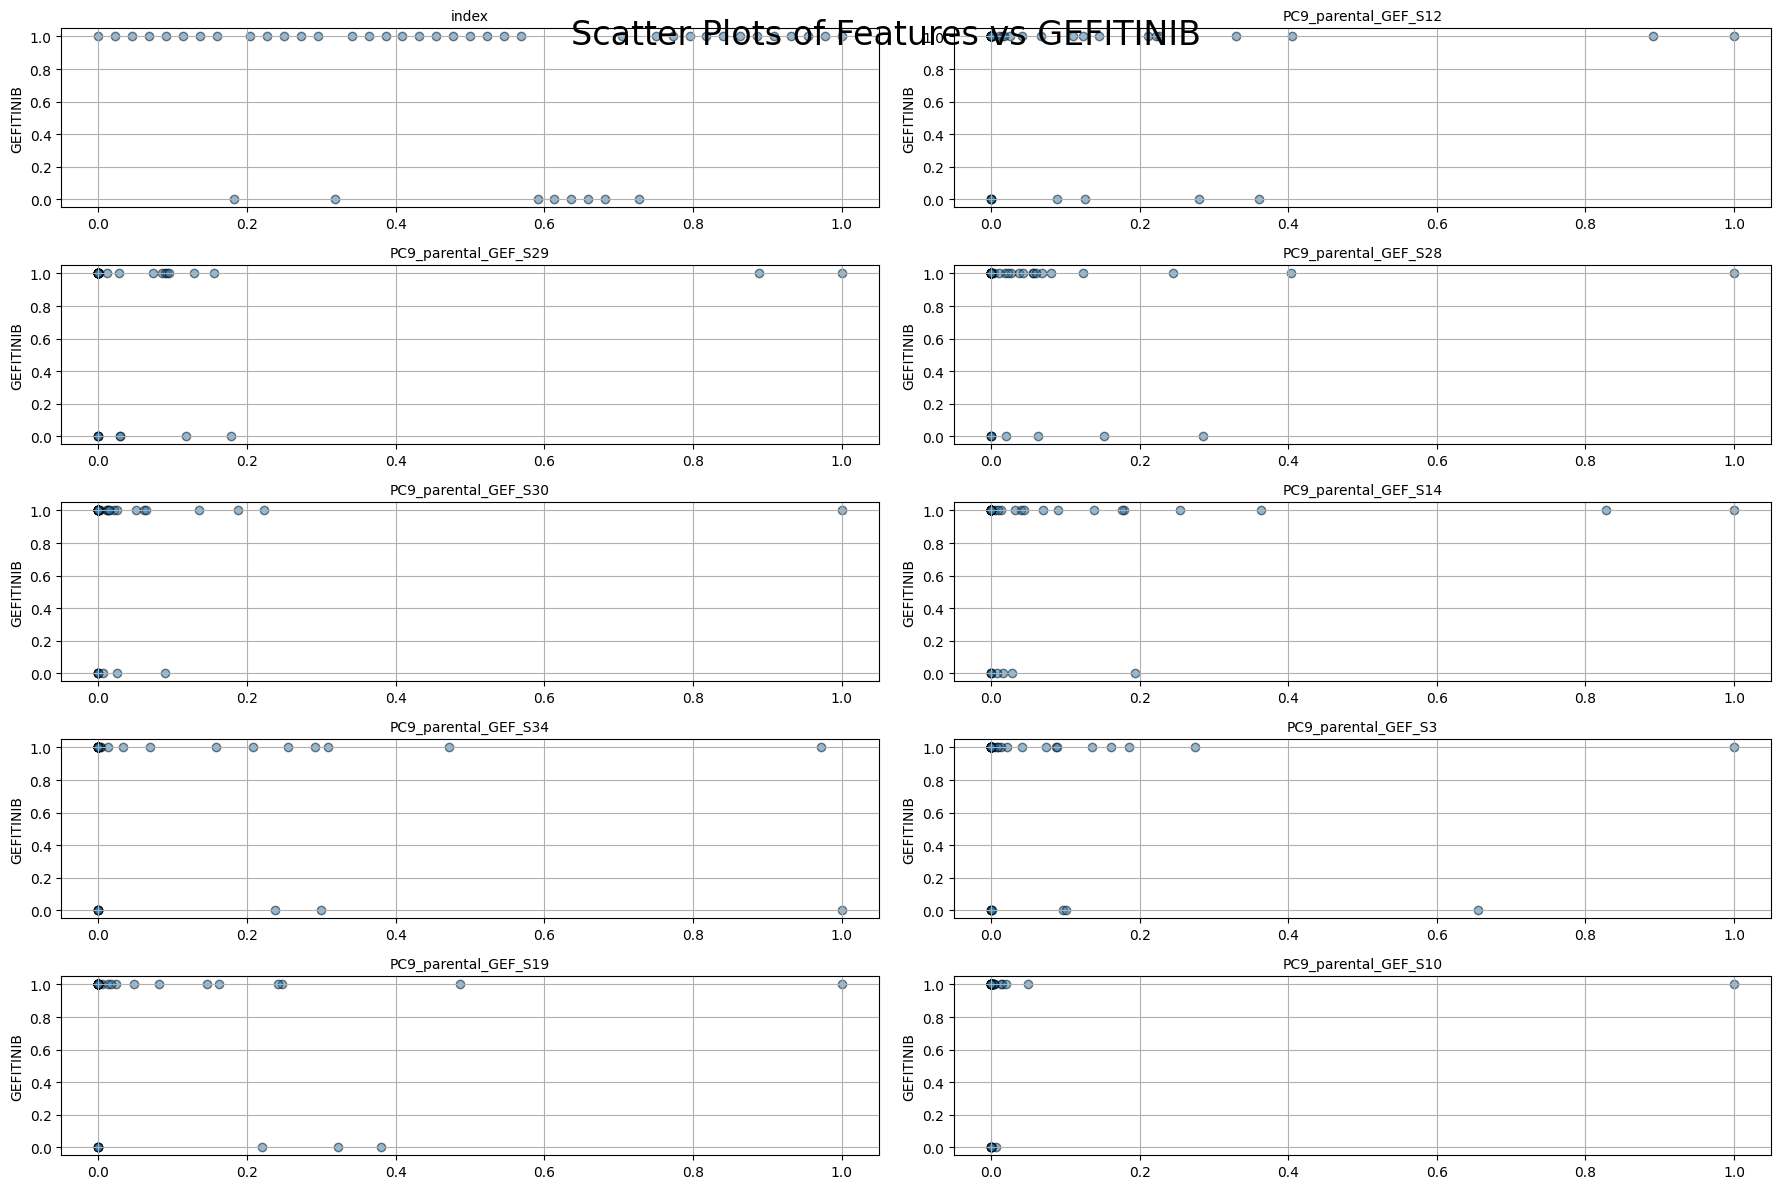

In [6]:
# Scatter plots for features vs ERLOTINIB
plt.figure(figsize=(18, 12))
for i, feature in enumerate(X.columns[:10]):  # Adjust based on number of features
    plt.subplot(5, 2, i+1)  # Adjust grid size based on number of features
    plt.scatter(X[feature], y1, alpha=0.5, edgecolor='k')
    plt.title(feature, fontsize=10)
    plt.xlabel('')
    plt.ylabel(target_column_1)
    plt.grid(True)

plt.tight_layout()
plt.suptitle(f'Scatter Plots of Features vs {target_column_1}', fontsize=24)
plt.show()

# Scatter plots for features vs GEFITINIB
plt.figure(figsize=(18, 12))
for i, feature in enumerate(X.columns[:10]):  # Adjust based on number of features
    plt.subplot(5, 2, i+1)  # Adjust grid size based on number of features
    plt.scatter(X[feature], y2, alpha=0.5, edgecolor='k')
    plt.title(feature, fontsize=10)
    plt.xlabel('')
    plt.ylabel(target_column_2)
    plt.grid(True)

plt.tight_layout()
plt.suptitle(f'Scatter Plots of Features vs {target_column_2}', fontsize=24)
plt.show()


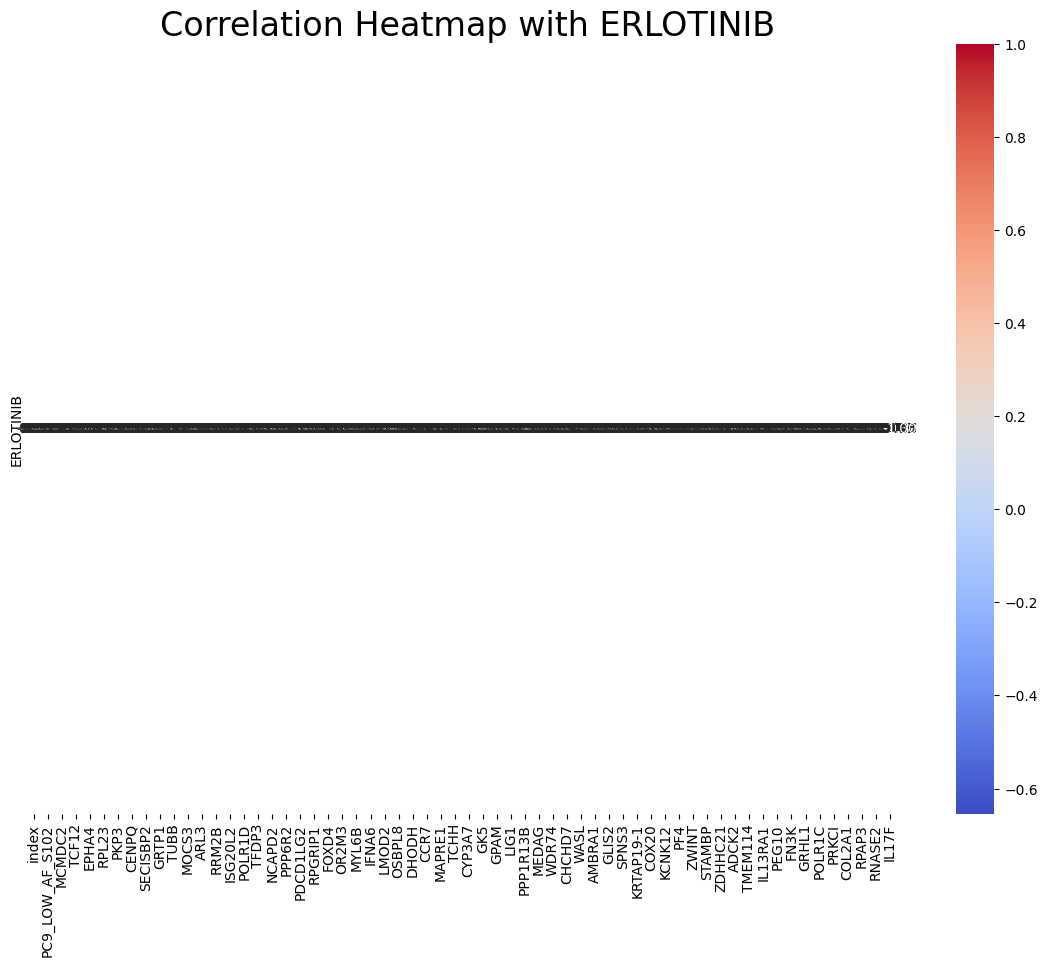

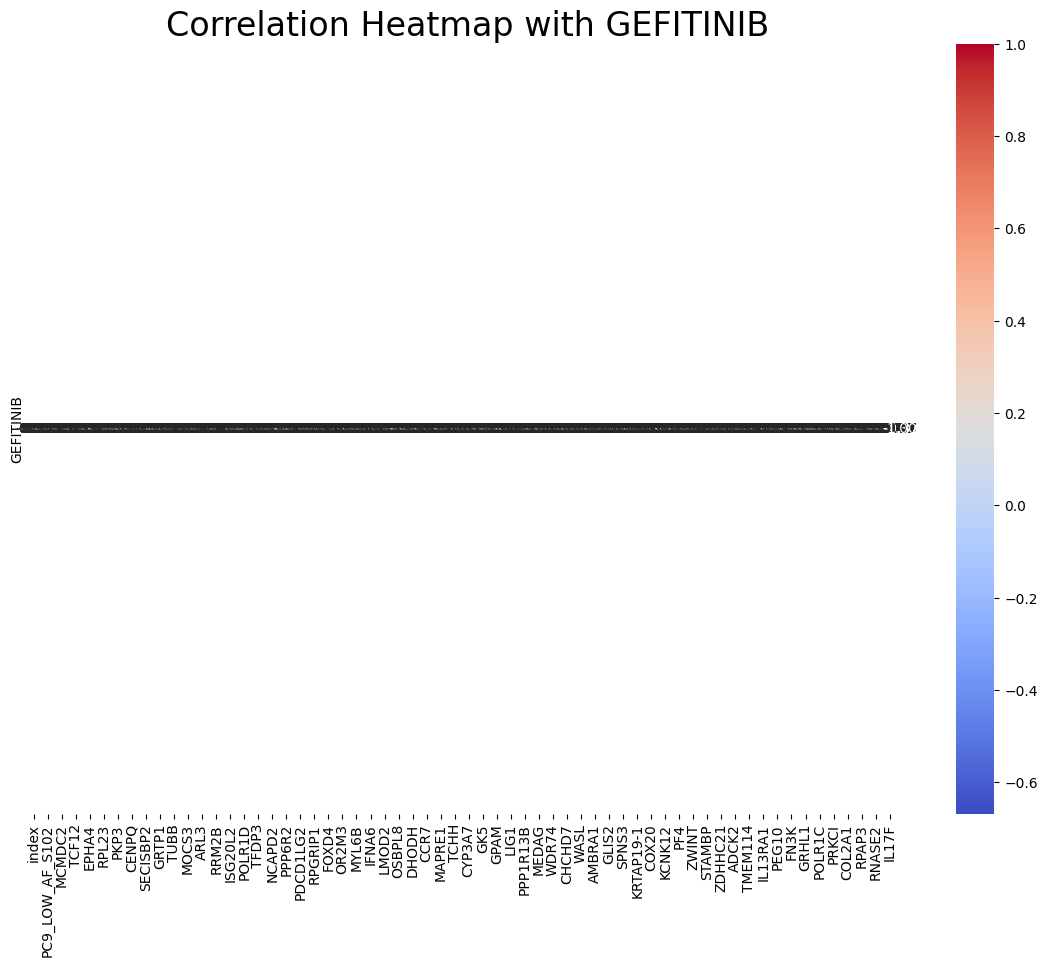

In [4]:
# Make sure to run the cell where X is defined (ipython-input-59-2b47c4a30f78) before this cell.
# If you have restarted the kernel, re-run the cell below to redefine X, y1, and y2.

import pandas as pd
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt  # Import matplotlib.pyplot
import seaborn as sns  # Import seaborn

# Load the gene expression data
Gene_drug = pd.read_csv('/content/final_df.csv')

# Define targets
target_column_1 = 'ERLOTINIB'
target_column_2 = 'GEFITINIB'

# Separate features and target variables
X = Gene_drug.drop(columns=[target_column_1, target_column_2])
y1 = Gene_drug[target_column_1]
y2 = Gene_drug[target_column_2]

# Compute the correlation with ERLOTINIB
correlation_with_y1 = X.join(y1).corr()[target_column_1]

# Compute the correlation with GEFITINIB
correlation_with_y2 = X.join(y2).corr()[target_column_2]

# Plot correlation heatmaps
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_with_y1.to_frame().T, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title(f'Correlation Heatmap with {target_column_1}', fontsize=24)
plt.show()

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_with_y2.to_frame().T, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title(f'Correlation Heatmap with {target_column_2}', fontsize=24)
plt.show()

# Modeling

In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA # Import PCA
import pandas as pd # Import pandas

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA # Import PCA
import pandas as pd # Import pandas



# Assuming X_scaled and y are defined in your previous code cells
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) # Define and assign X_scaled
# Apply PCA to the entire dataset
pca = PCA(n_components=min(X_scaled.shape[0], X_scaled.shape[1]))  # Set n_components to the minimum
# or you can explicitly set it to 45:
# pca = PCA(n_components=45)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame with the PCA results
pca_columns = [f'PC{i+1}' for i in range(X_pca.shape[1])]
X_pca_df = pd.DataFrame(X_pca, columns=pca_columns)

print(f"Original number of features: {X_scaled.shape[1]}")
print(f"Reduced number of features after PCA: {X_pca.shape[1]}")

# Show the first few rows of the PCA-reduced feature set
print(X_pca_df.head())
y = y1
# Now you can use X_pca_df in the train_test_split function
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_pca_df, y, test_size=0.3, random_state=42)

# Initialize and train model
reg = RandomForestRegressor(n_estimators=100, random_state=42)
reg.fit(X_train, y_train)

# Make predictions and evaluate
y_pred = reg.predict(X_test)
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"R^2 Score: {r2_score(y_test, y_pred)}")

Original number of features: 16515
Reduced number of features after PCA: 45
         PC1        PC2        PC3        PC4        PC5         PC6  \
0 -11.384443  63.016657  76.250241 -32.169342 -32.369898  113.251625   
1 -12.480618 -19.548722  12.514839 -13.738944 -15.629672   -4.522267   
2 -49.003802 -45.863296 -15.408448 -19.317689   3.082491   24.613284   
3 -55.447305 -28.837787  -0.836930 -24.017870  42.533261    7.390507   
4 -29.665582 -33.917675  10.033015 -28.207218  41.363247   12.647989   

         PC7        PC8        PC9       PC10  ...       PC36       PC37  \
0 -17.735957 -32.560459 -33.201198  27.478309  ...   2.607331  -2.023614   
1   2.305972  11.579429  39.160232  -2.461880  ... -11.366546   1.896210   
2  14.726583   0.770621  -6.261683 -33.801333  ...  10.923569 -38.428710   
3  27.328629  13.113558 -15.713772  -2.043074  ... -14.538898  24.494069   
4  21.582128  -7.504801 -23.310590 -21.822935  ...   0.660153  -2.278463   

        PC38       PC39       PC40

1. **Linear Regression**


In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
Final_df = pd.read_csv('/content/final_df.csv')
# Features
X = Final_df.drop(['ERLOTINIB', 'GEFITINIB'], axis=1)
# Targets
y_ERLOTINIB = Final_df['ERLOTINIB']
y_GEFITINIB = Final_df['GEFITINIB']
# Splitting the data
X_train, X_test, y_train_ERLOTINIB, y_test_ERLOTINIB = train_test_split(X, y_ERLOTINIB, test_size=0.2, random_state=42)
X_train, X_test, y_train_GEFITINIB, y_test_GEFITINIB = train_test_split(X, y_GEFITINIB, test_size=0.2, random_state=42)

In [15]:
print(y_train_GEFITINIB.unique())
print(y_test_GEFITINIB.unique())

[1. 0.]
[1. 0.]


In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split  # Import train_test_split
import pandas as pd  # Import pandas if not already imported
# Splitting the data for GEFITINIB target
X_train, X_test, y_train_GEFITINIB, y_test_GEFITINIB = train_test_split(
    X, y2,  # Use y2 (GEFITINIB target)
    test_size=0.2, random_state=42
)
# Initialize the model
lin_reg = LinearRegression()

# Train the model
lin_reg.fit(X_train, y_train_GEFITINIB)  # Use y_train_GEFITINIB

LinearRegression()

In [25]:
# Predictions on the test set
y_pred = lin_reg.predict(X_test)

# Calculate mean squared error
# Replace y_test with y_test_GEFITINIB
mse = mean_squared_error(y_test_GEFITINIB, y_pred)
print(f'Mean Squared Error: {mse}')

# Calculate R^2 score
# Replace y_test with y_test_GEFITINIB
r2 = r2_score(y_test_GEFITINIB, y_pred)
print(f'R^2 Score: {r2}')

Mean Squared Error: 0.12120519565557905
R^2 Score: 0.2987413679927212


In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Your existing code for predictions
y_pred = lin_reg.predict(X_test)

# Calculate mean squared error
# Use y_test_GEFITINIB instead of y_test
mse = mean_squared_error(y_test_GEFITINIB, y_pred)
print(f'Mean Squared Error: {mse}')

# Now you can use mean_absolute_error, mean_squared_error, and r2_score without errors
rmse = np.sqrt(mse)
# Use y_test_GEFITINIB instead of y_test
mae = mean_absolute_error(y_test_GEFITINIB, y_pred)
# Use y_test_GEFITINIB instead of y_test
r2 = r2_score(y_test_GEFITINIB, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 0.12120519565557905
Mean Absolute Error: 0.2619940350850291
Root Mean Squared Error: 0.34814536569596766
R^2 Score: 0.2987413679927212


In [33]:
from sklearn.linear_model import LinearRegression # Changed 'Linearregression' to 'LinearRegression'
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the model
lin_reg = LinearRegression()

# Train the model
lin_reg.fit(X_train, y_train_GEFITINIB)

LinearRegression()

2. **Decision Tree Regressor**


In [34]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the model
dt_model = DecisionTreeRegressor(random_state=42)

# Train the model
dt_model.fit(X_train, y_train_ERLOTINIB)

# Make predictions
dt_predictions = dt_model.predict(X_test)

# Evaluate the model
dt_mae = mean_absolute_error(y_test_ERLOTINIB, dt_predictions)
dt_rmse = np.sqrt(mean_squared_error(y_test_ERLOTINIB, dt_predictions))
dt_r2 = r2_score(y_test_ERLOTINIB, dt_predictions)

print(f'Decision Tree - Mean Absolute Error: {dt_mae}')
print(f'Decision Tree - Root Mean Squared Error: {dt_rmse}')
print(f'Decision Tree - R^2 Score: {dt_r2}')


Decision Tree - Mean Absolute Error: 0.2222222222222222
Decision Tree - Root Mean Squared Error: 0.4714045207910317
Decision Tree - R^2 Score: -0.2857142857142856


3. **Random Forest Regressor**


In [35]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train_ERLOTINIB)

# Make predictions
rf_predictions = rf_model.predict(X_test)

# Evaluate the model
rf_mae = mean_absolute_error(y_test_ERLOTINIB, rf_predictions)
rf_rmse = np.sqrt(mean_squared_error(y_test_ERLOTINIB, rf_predictions))
rf_r2 = r2_score(y_test_ERLOTINIB, rf_predictions)

print(f'Random Forest - Mean Absolute Error: {rf_mae}')
print(f'Random Forest - Root Mean Squared Error: {rf_rmse}')
print(f'Random Forest - R^2 Score: {rf_r2}')


Random Forest - Mean Absolute Error: 0.2677777777777778
Random Forest - Root Mean Squared Error: 0.3857892343408941
Random Forest - R^2 Score: 0.13889285714285704


4. **Gradient Boosting Regressor**


In [36]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the model
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Train the model
gb_model.fit(X_train, y_train_ERLOTINIB)

# Make predictions
gb_predictions = gb_model.predict(X_test)

# Evaluate the model
gb_mae = mean_absolute_error(y_test_ERLOTINIB, gb_predictions)
gb_rmse = np.sqrt(mean_squared_error(y_test_ERLOTINIB, gb_predictions))
gb_r2 = r2_score(y_test_ERLOTINIB, gb_predictions)

print(f'Gradient Boosting - Mean Absolute Error: {gb_mae}')
print(f'Gradient Boosting - Root Mean Squared Error: {gb_rmse}')
print(f'Gradient Boosting - R^2 Score: {gb_r2}')

Gradient Boosting - Mean Absolute Error: 0.28973745394081757
Gradient Boosting - Root Mean Squared Error: 0.41369422148256113
Gradient Boosting - R^2 Score: 0.009816027147639406


5. **Support Vector Regressor**


In [37]:
from sklearn.svm import SVR

# Initialize the model
svr_model = SVR()

# Train the model
svr_model.fit(X_train, y_train_ERLOTINIB)

# Make predictions
svr_predictions = svr_model.predict(X_test)

# Evaluate the model
svr_mae = mean_absolute_error(y_test_ERLOTINIB, svr_predictions)
svr_rmse = np.sqrt(mean_squared_error(y_test_ERLOTINIB, svr_predictions))
svr_r2 = r2_score(y_test_ERLOTINIB, svr_predictions)

print(f'Support Vector Regression - Mean Absolute Error: {svr_mae}')
print(f'Support Vector Regression - Root Mean Squared Error: {svr_rmse}')
print(f'Support Vector Regression - R^2 Score: {svr_r2}')

Support Vector Regression - Mean Absolute Error: 0.295057778769771
Support Vector Regression - Root Mean Squared Error: 0.37951828869330506
Support Vector Regression - R^2 Score: 0.16665966802369414


# Deep Learning Model

1. **LSTM**

In [38]:
rom sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [39]:
import numpy as np

# Reshape input to match LSTM expected input shape
X_train_scaled_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, -1))
X_test_scaled_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, -1))

In [40]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Define the LSTM model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(1, X_train_scaled.shape[1])),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train_scaled_reshaped, y_train_ERLOTINIB, epochs=100, batch_size=32, validation_split=0.2)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 1.4159 - val_loss: 20.9109
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step - loss: 8.5364 - val_loss: 12.6893
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step - loss: 45.6537 - val_loss: 18.4513
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step - loss: 7.5664 - val_loss: 18.5790
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step - loss: 3.8304 - val_loss: 18.7795
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step - loss: 5.4750 - val_loss: 20.8693
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step - loss: 4.9101 - val_loss: 25.5007
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step - loss: 2.1926 - val_loss: 31.8662
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step - loss: 0.8188 - val_loss: 38.3374
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step - loss: 1.0426 - val_loss: 43.6277
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step - loss: 1.5567 - val_loss: 47.5559
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step - 

In [41]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 50)                  │       3,313,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,939,755 (37.92 MB)

 Trainable params: 3,313,251 (12.64 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,626,504 (25.28 MB)

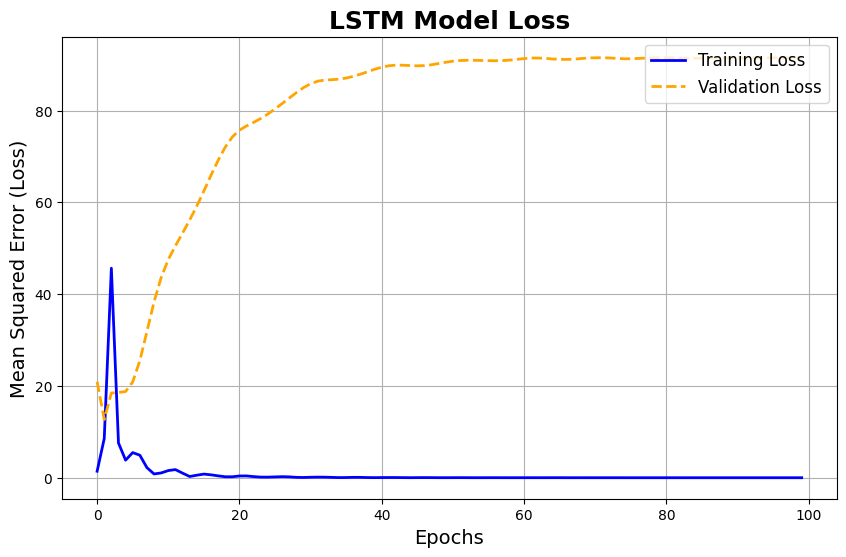

In [42]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange', linestyle='--', linewidth=2)
plt.title('LSTM Model Loss', fontsize=18, fontweight='bold')
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Mean Squared Error (Loss)', fontsize=14)
plt.legend(loc='upper right', fontsize=12)
plt.grid(True)
plt.show()


In [43]:
loss = model.evaluate(X_test_scaled_reshaped, y_test_ERLOTINIB)
print(f'Test Loss: {loss}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - loss: 10.1008
Test Loss: 10.100842475891113


In [44]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Generate predictions on the test set
predictions = model.predict(X_test_scaled_reshaped)

# Flatten the predictions array if it's not already flat
predictions_flat = predictions.flatten()

# Calculate MAE
mae = mean_absolute_error(y_test_ERLOTINIB, predictions_flat)
print(f'Mean Absolute Error: {mae}')

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test_ERLOTINIB, predictions_flat))
print(f'Root Mean Squared Error: {rmse}')

# Calculate R²
r2 = r2_score(y_test_ERLOTINIB, predictions_flat)
print(f'R^2 Score: {r2}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
Mean Absolute Error: 1.7977547016408708
Root Mean Squared Error: 3.1781824151061
R^2 Score: -57.44059432563293


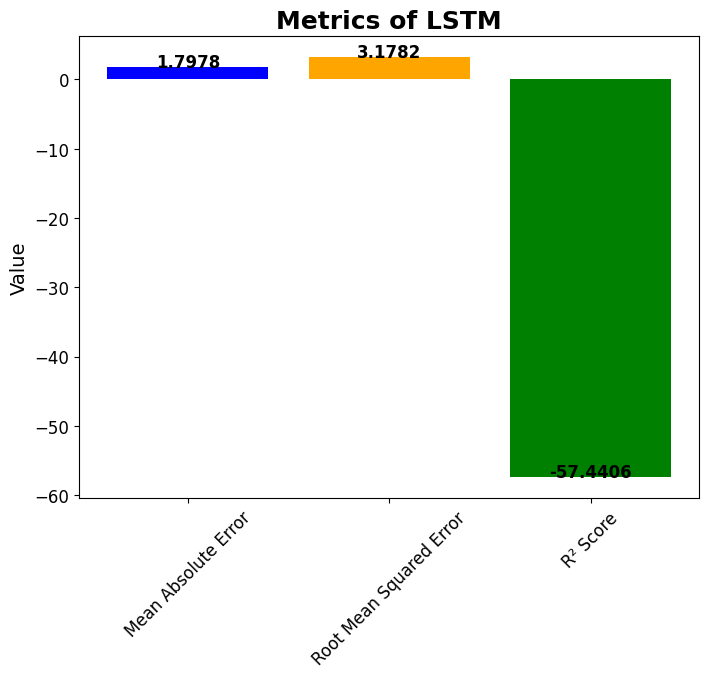

In [45]:
import matplotlib.pyplot as plt
import numpy as np

# Define the metrics
metrics = {'Mean Absolute Error': mae, 'Root Mean Squared Error': rmse, 'R² Score': r2}

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(metrics.keys(), metrics.values(), color=['blue', 'orange', 'green'])

# Adding title and labels
plt.title('Metrics of LSTM', fontsize=18, fontweight='bold')
plt.ylabel('Value', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Display the value of each bar on top
for i, (metric, value) in enumerate(metrics.items()):
    plt.text(i, value + 0.01, f'{value:.4f}', ha='center', fontsize=12, fontweight='bold')

plt.show()


2. **ResNet-50**

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 4.5729 - val_loss: 4.3280 - learning_rate: 0.0010
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step - loss: 6.5760 - val_loss: 5.2911 - learning_rate: 0.0010
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - loss: 4.3717 - val_loss: 6.5392 - learning_rate: 0.0010
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - loss: 3.3237 - val_loss: 7.4065 - learning_rate: 0.0010
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - loss: 3.1967 - val_loss: 7.6082 - learning_rate: 0.0010
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step - loss: 5.0660 - val_loss: 7.4813 - learning_rate: 0.0010
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - loss: 4.2316 - val_loss: 6.6958 - learning_rate: 5.0000e-04
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - loss: 5.2847 - val_loss: 6.0436 - learning_rate: 5.0000e-04
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - loss: 4.1611 - val_loss: 5.4544 - learning_rate: 5.0000e-04
Epoch 10/100

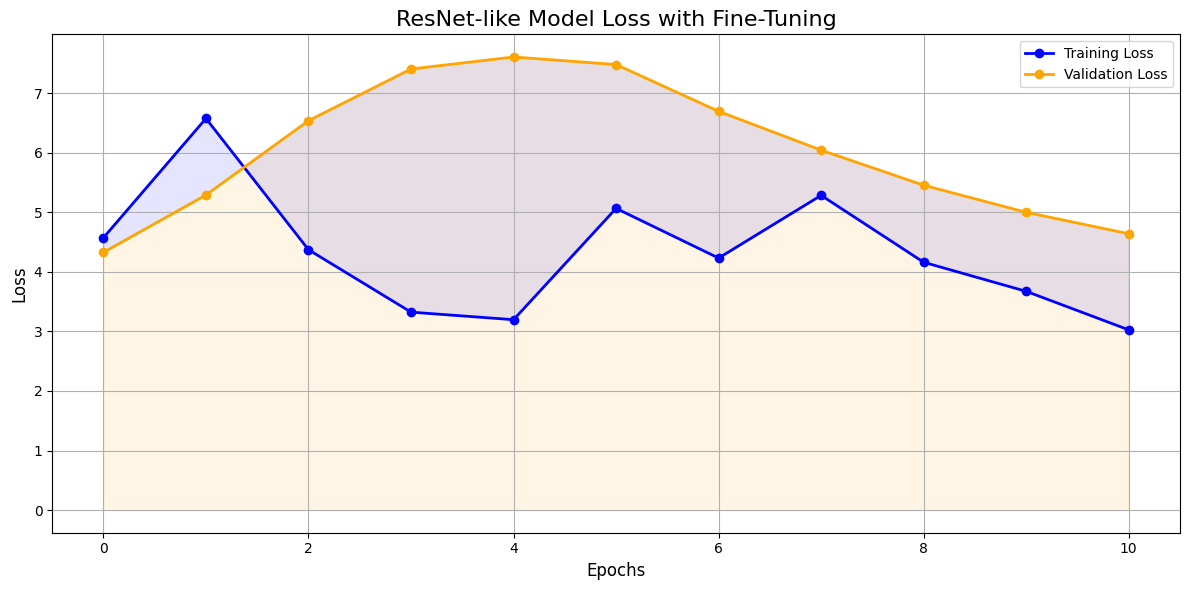

In [46]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Define a modified ResNet-like model for tabular data
def create_resnet_model(input_shape):
    model = Sequential([
        Dense(128, activation='relu', input_shape=(input_shape,)),
        BatchNormalization(),
        Dropout(0.5),
        Dense(128, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        Dense(64, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        Dense(32, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        Dense(1)  # Regression output
    ])
    return model

# Instantiate and compile the model
resnet_model = create_resnet_model(X_train_scaled.shape[1])
optimizer = Adam(learning_rate=0.001)
resnet_model.compile(optimizer=optimizer, loss='mse')

# Callbacks for early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00001)

# Train the model
history_resnet = resnet_model.fit(
    X_train_scaled, y_train_ERLOTINIB,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping, reduce_lr]
)

# Evaluate the model
loss_resnet = resnet_model.evaluate(X_test_scaled, y_test_ERLOTINIB)
print(f'Test Loss (ResNet-like Model): {loss_resnet}')

# Generate predictions on the test set
predictions_resnet = resnet_model.predict(X_test_scaled)
predictions_resnet_flat = predictions_resnet.flatten()

# Calculate MAE, RMSE, and R²
mae_resnet = mean_absolute_error(y_test_ERLOTINIB, predictions_resnet_flat)
rmse_resnet = np.sqrt(mean_squared_error(y_test_ERLOTINIB, predictions_resnet_flat))
r2_resnet = r2_score(y_test_ERLOTINIB, predictions_resnet_flat)

print(f'Mean Absolute Error (ResNet-like Model): {mae_resnet}')
print(f'Root Mean Squared Error (ResNet-like Model): {rmse_resnet}')
print(f'R^2 Score (ResNet-like Model): {r2_resnet}')

# Plot training and validation loss
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(history_resnet.history['loss'], label='Training Loss', marker='o', color='blue', linewidth=2)
ax.plot(history_resnet.history['val_loss'], label='Validation Loss', marker='o', color='orange', linewidth=2)
ax.fill_between(range(len(history_resnet.history['loss'])), history_resnet.history['loss'], history_resnet.history['val_loss'], color='blue', alpha=0.1)
ax.fill_between(range(len(history_resnet.history['val_loss'])), history_resnet.history['val_loss'], color='orange', alpha=0.1)
ax.set_title('ResNet-like Model Loss with Fine-Tuning', fontsize=16)
ax.set_xlabel('Epochs', fontsize=12)
ax.set_ylabel('Loss', fontsize=12)
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()


In [47]:
resnet_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                      │ (None, 128)                 │       2,114,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,425,605 (24.51 MB)

 Trainable params: 2,141,633 (8.17 MB)

 Non-trainable params: 704 (2.75 KB)

 Optimizer params: 4,283,268 (16.34 MB)

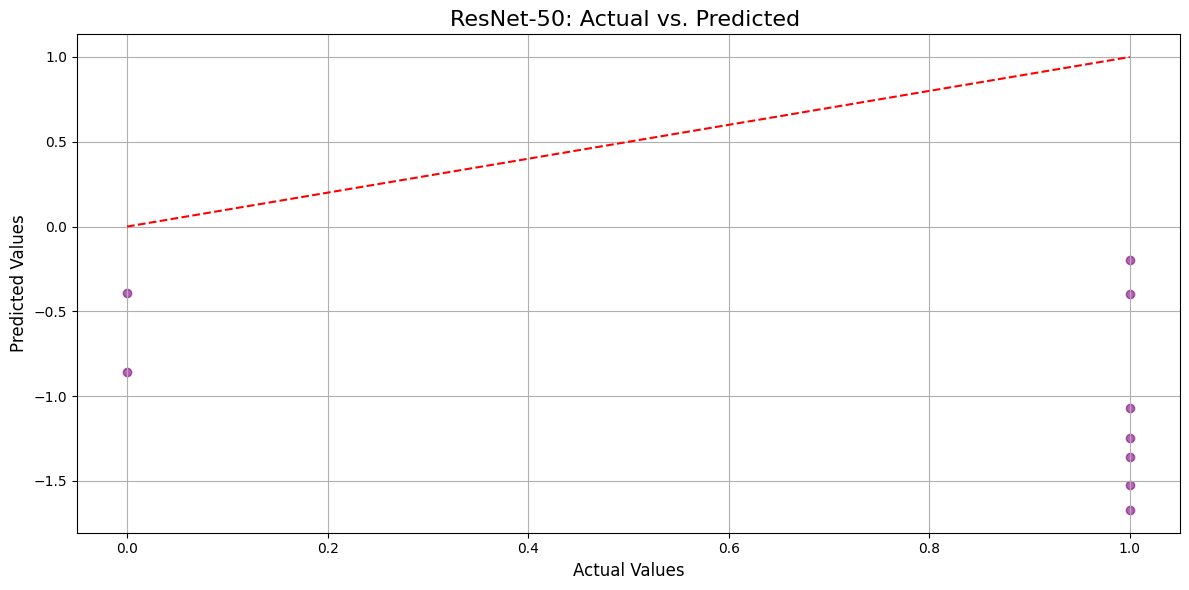

In [48]:
# Plot Actual vs. Predicted values
plt.figure(figsize=(12, 6))
plt.scatter(y_test_ERLOTINIB, predictions_resnet_flat, color='purple', alpha=0.6)
plt.plot([min(y_test_ERLOTINIB), max(y_test_ERLOTINIB)], [min(y_test_ERLOTINIB), max(y_test_ERLOTINIB)], color='red', linestyle='--')
plt.title('ResNet-50: Actual vs. Predicted ', fontsize=16)
plt.xlabel('Actual Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


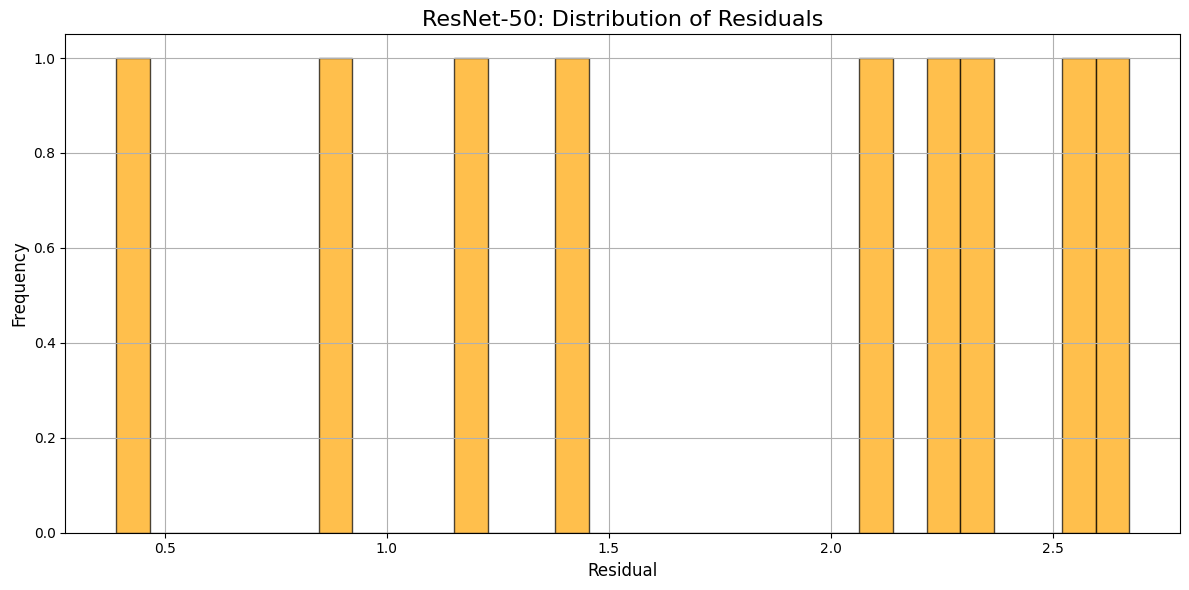

In [52]:
# Plot distribution of residuals
plt.figure(figsize=(12, 6))

# Calculate residuals before plotting
residuals = y_test_ERLOTINIB - predictions_resnet_flat

plt.hist(residuals, bins=30, color='orange', edgecolor='black', alpha=0.7)
plt.title('ResNet-50: Distribution of Residuals', fontsize=16)
plt.xlabel('Residual', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

2. **Graph Neural Network**


In [53]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Define the updated Neural Network model
nn_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(1)
])

# Compile the Neural Network model with Adam optimizer and learning rate scheduling
optimizer = Adam(learning_rate=0.001)
nn_model.compile(optimizer=optimizer, loss='mse')

# Callbacks for early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00001)

# Train the Neural Network model
history_nn = nn_model.fit(
    X_train_scaled, y_train_ERLOTINIB,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping, reduce_lr]
)

# Evaluate the Neural Network model
loss_nn = nn_model.evaluate(X_test_scaled, y_test_ERLOTINIB)
print(f'Test Loss (Neural Network): {loss_nn}')

# Generate predictions on the test set for the Neural Network
predictions_nn = nn_model.predict(X_test_scaled)

# Flatten the predictions array if it's not already flat
predictions_nn_flat = predictions_nn.flatten()

# Calculate MAE for the Neural Network
mae_nn = mean_absolute_error(y_test_ERLOTINIB, predictions_nn_flat)
print(f'Mean Absolute Error (Neural Network): {mae_nn}')

# Calculate RMSE for the Neural Network
rmse_nn = np.sqrt(mean_squared_error(y_test_ERLOTINIB, predictions_nn_flat))
print(f'Root Mean Squared Error (Neural Network): {rmse_nn}')

# Calculate R² for the Neural Network
r2_nn = r2_score(y_test_ERLOTINIB, predictions_nn_flat)
print(f'R^2 Score (Neural Network): {r2_nn}')


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - loss: 3.7129 - val_loss: 1.2850 - learning_rate: 0.0010
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step - loss: 3.7823 - val_loss: 2.7044 - learning_rate: 0.0010
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step - loss: 3.5717 - val_loss: 4.2696 - learning_rate: 0.0010
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step - loss: 5.1303 - val_loss: 4.4013 - learning_rate: 0.0010
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step - loss: 4.5147 - val_loss: 3.5683 - learning_rate: 0.0010
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - loss: 3.2099 - val_loss: 2.8713 - learning_rate: 0.0010
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - loss: 4.7639 - val_loss: 2.3407 - learning_rate: 5.0000e-04
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step - loss: 3.7428 - val_loss: 1.8701 - learning_rate: 5.0000e-04
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step - loss: 3.6778 - val_loss: 1.6017 - learning_rate: 5.0000e-04
Epoch 10/100
1/1 ━━━━━

In [54]:
nn_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 128)                 │       2,114,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,375,045 (24.32 MB)

 Trainable params: 2,124,865 (8.11 MB)

 Non-trainable params: 448 (1.75 KB)

 Optimizer params: 4,249,732 (16.21 MB)

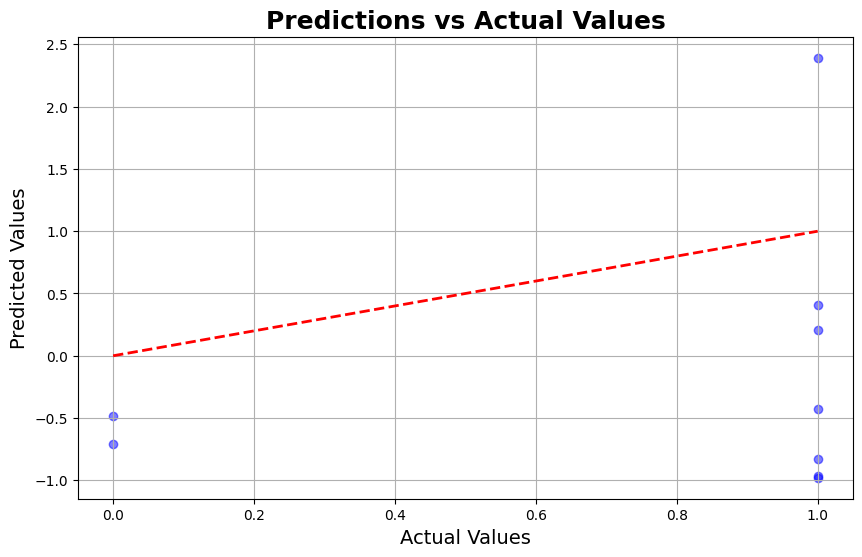

In [55]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test_ERLOTINIB, predictions_nn_flat, alpha=0.5, color='blue')
plt.plot([y_test_ERLOTINIB.min(), y_test_ERLOTINIB.max()], [y_test_ERLOTINIB.min(), y_test_ERLOTINIB.max()], 'r--', linewidth=2)
plt.title('Predictions vs Actual Values', fontsize=18, fontweight='bold')
plt.xlabel('Actual Values', fontsize=14)
plt.ylabel('Predicted Values', fontsize=14)
plt.grid(True)
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


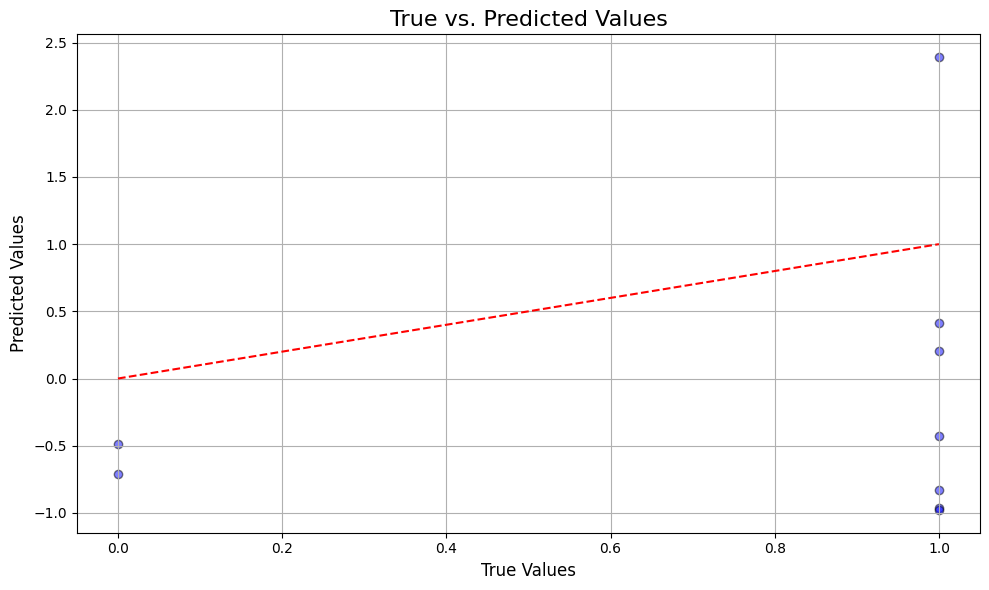

In [56]:
# Generate predictions on the test set
predictions_nn = nn_model.predict(X_test_scaled)

# Plot predictions vs. true values
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(y_test_ERLOTINIB, predictions_nn, color='blue', alpha=0.5, edgecolors='k')
ax.plot([min(y_test_ERLOTINIB), max(y_test_ERLOTINIB)], [min(y_test_ERLOTINIB), max(y_test_ERLOTINIB)], color='red', linestyle='--')

# Set plot title and labels
ax.set_title('True vs. Predicted Values', fontsize=16)
ax.set_xlabel('True Values', fontsize=12)
ax.set_ylabel('Predicted Values', fontsize=12)

# Add grid
ax.grid(True)

# Improve layout and show the plot
plt.tight_layout()
plt.show()


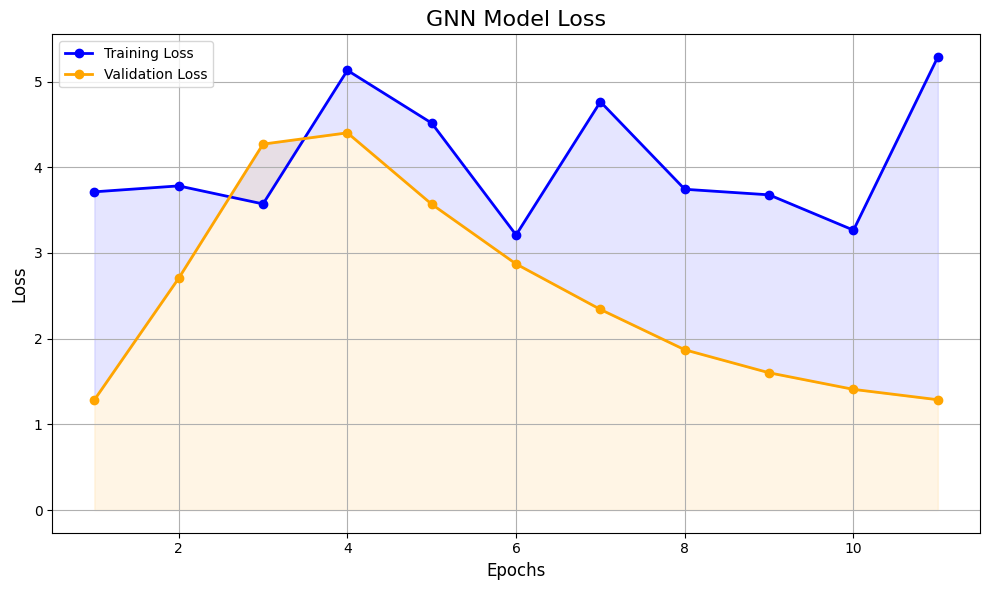

In [57]:
import matplotlib.pyplot as plt

# Plot training and validation loss
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(range(1, len(history_nn.history['loss']) + 1), history_nn.history['loss'], label='Training Loss', marker='o', color='blue', linewidth=2)
ax.plot(range(1, len(history_nn.history['val_loss']) + 1), history_nn.history['val_loss'], label='Validation Loss', marker='o', color='orange', linewidth=2)

# Fill between the training and validation loss lines
ax.fill_between(range(1, len(history_nn.history['loss']) + 1), history_nn.history['loss'], history_nn.history['val_loss'], color='blue', alpha=0.1)
ax.fill_between(range(1, len(history_nn.history['val_loss']) + 1), history_nn.history['val_loss'], color='orange', alpha=0.1)

# Set plot title and labels
ax.set_title('GNN Model Loss', fontsize=16)
ax.set_xlabel('Epochs', fontsize=12)
ax.set_ylabel('Loss', fontsize=12)

# Add legend and grid
ax.legend()
ax.grid(True)

# Improve layout and show the plot
plt.tight_layout()
plt.show()


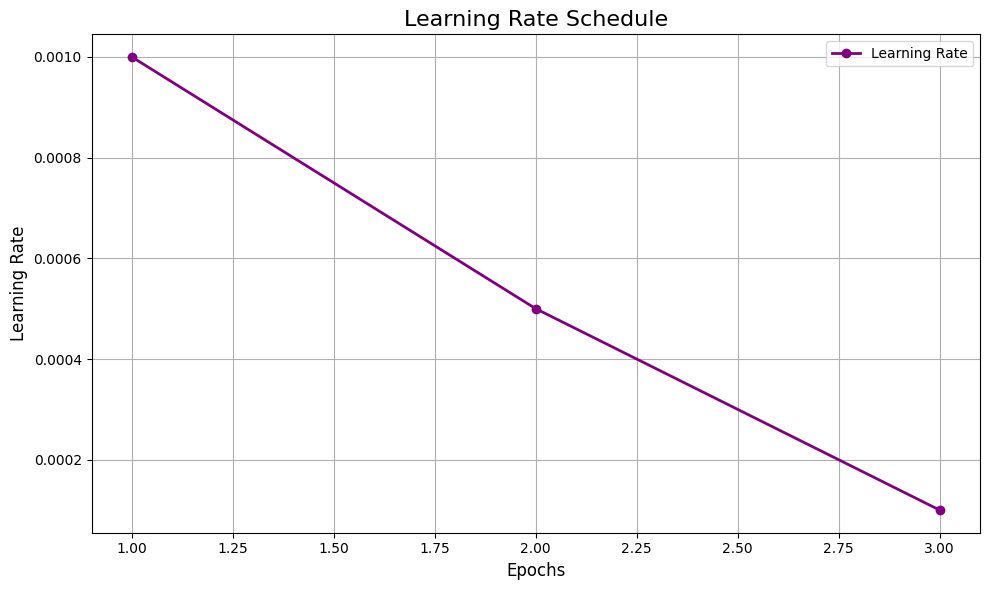

In [58]:
# Example learning rate schedule values (replace with actual values)
learning_rates = [0.001, 0.0005, 0.0001]  # Replace with actual learning rates

# Plot learning rate schedule
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(range(1, len(learning_rates) + 1), learning_rates, label='Learning Rate', marker='o', color='purple', linewidth=2)

# Set plot title and labels
ax.set_title('Learning Rate Schedule', fontsize=16)
ax.set_xlabel('Epochs', fontsize=12)
ax.set_ylabel('Learning Rate', fontsize=12)

# Add legend and grid
ax.legend()
ax.grid(True)

# Improve layout and show the plot
plt.tight_layout()
plt.show()


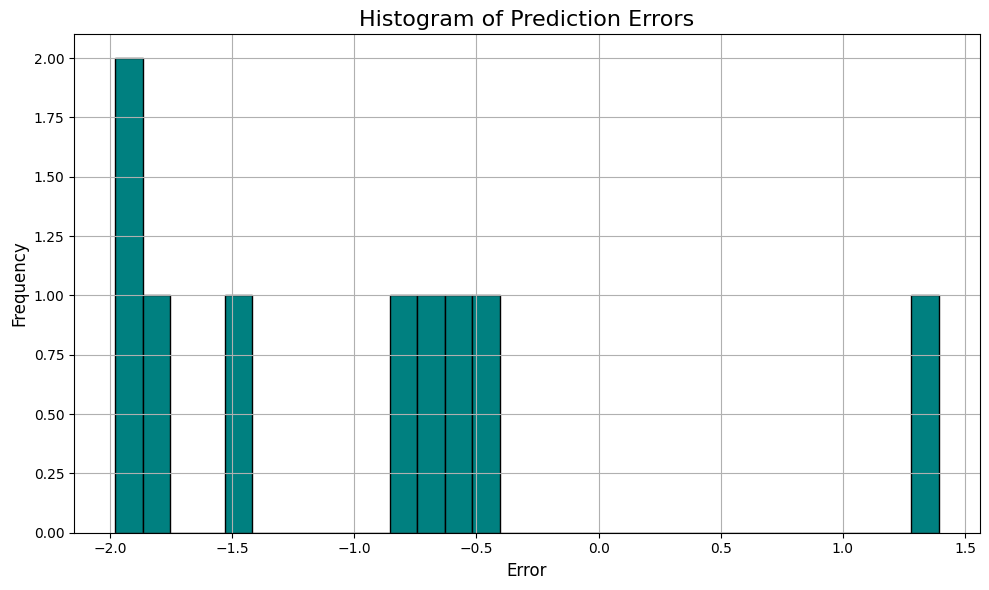

In [59]:
# Calculate prediction errors
errors = predictions_nn.flatten() - y_test_ERLOTINIB

# Plot histogram of prediction errors
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(errors, bins=30, color='teal', edgecolor='black')

# Set plot title and labels
ax.set_title('Histogram of Prediction Errors', fontsize=16)
ax.set_xlabel('Error', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

# Add grid
ax.grid(True)

# Improve layout and show the plot
plt.tight_layout()
plt.show()


3. **ResNET-50**

In [60]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Define the Neural Network model with additional techniques
nn_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],), kernel_regularizer=l2(0.01)),
    Dropout(0.4),
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(1)
])

# Compile the Neural Network model
nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mse')

# Callbacks for early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00001)

# Train the Neural Network model
history_nn = nn_model.fit(X_train_scaled, y_train_ERLOTINIB, epochs=300, batch_size=32, validation_split=0.2, callbacks=[early_stopping, reduce_lr])

# Evaluate the Neural Network model
loss_nn = nn_model.evaluate(X_test_scaled, y_test_ERLOTINIB)
print(f'Test Loss (Neural Network): {loss_nn}')

# Generate predictions on the test set for the Neural Network
predictions_nn = nn_model.predict(X_test_scaled)

# Flatten the predictions array if it's not already flat
predictions_nn_flat = predictions_nn.flatten()

# Calculate MAE, RMSE, and R² for the Neural Network
mae_nn = mean_absolute_error(y_test_ERLOTINIB, predictions_nn_flat)
rmse_nn = np.sqrt(mean_squared_error(y_test_ERLOTINIB, predictions_nn_flat))
r2_nn = r2_score(y_test_ERLOTINIB, predictions_nn_flat)



Epoch 1/300


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 8.6276 - val_loss: 17.3888 - learning_rate: 0.0010
Epoch 2/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step - loss: 9.0849 - val_loss: 15.6251 - learning_rate: 0.0010
Epoch 3/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step - loss: 13.2634 - val_loss: 21.6065 - learning_rate: 0.0010
Epoch 4/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step - loss: 14.8275 - val_loss: 31.7090 - learning_rate: 0.0010
Epoch 5/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step - loss: 23.1416 - val_loss: 46.4299 - learning_rate: 0.0010
Epoch 6/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step - loss: 32.1675 - val_loss: 47.6547 - learning_rate: 0.0010
Epoch 7/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step - loss: 14.9432 - val_loss: 49.3742 - learning_rate: 0.0010
Epoch 8/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - loss: 17.9516 - val_loss: 52.0574 - learning_rate: 5.0000e-04
Epoch 9/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step - loss: 21.3764 - val_loss: 52.7703 - learning_rate: 5.0000e-04
Epoch 10/3

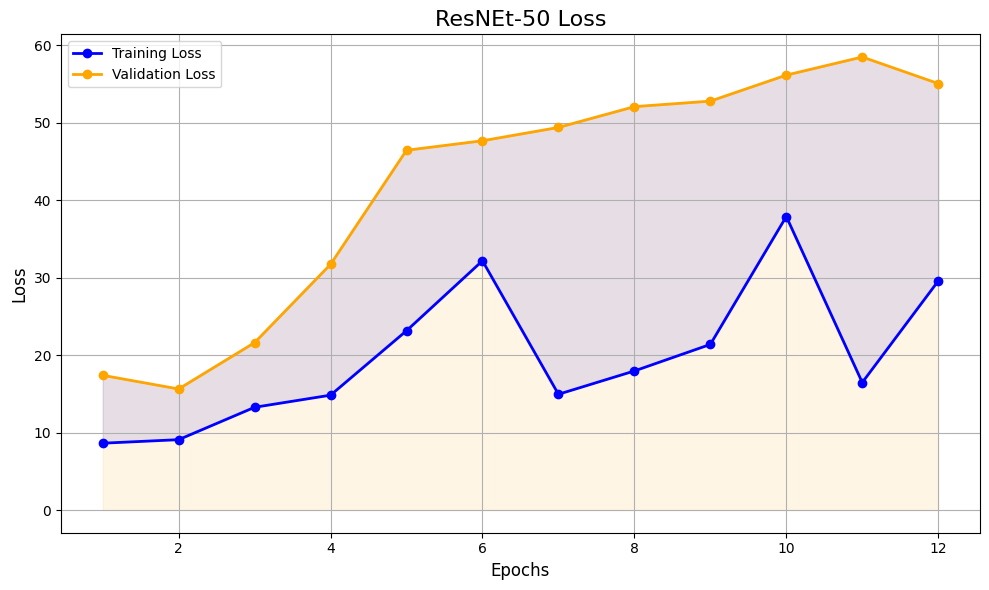

In [61]:
import matplotlib.pyplot as plt

# Extract data from the training history
epochs = range(1, len(history_nn.history['loss']) + 1)
loss = history_nn.history['loss']
val_loss = history_nn.history['val_loss']

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot training and validation loss with markers
ax.plot(epochs, loss, label='Training Loss', marker='o', color='blue', linewidth=2)
ax.plot(epochs, val_loss, label='Validation Loss', marker='o', color='orange', linewidth=2)

# Fill between the training and validation loss lines
ax.fill_between(epochs, loss, val_loss, color='blue', alpha=0.1)
ax.fill_between(epochs, val_loss, color='orange', alpha=0.1)

# Set plot title and labels
ax.set_title('ResNEt-50 Loss', fontsize=16)
ax.set_xlabel('Epochs', fontsize=12)
ax.set_ylabel('Loss', fontsize=12)

# Add legend and grid
ax.legend()
ax.grid(True)

# Improve layout and show the plot
plt.tight_layout()
plt.show()


In [62]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Evaluate the Neural Network model
loss_nn = nn_model.evaluate(X_test_scaled, y_test_ERLOTINIB)
print(f'Test Loss (Neural Network): {loss_nn}')

# Generate predictions on the test set for the Neural Network
predictions_nn = nn_model.predict(X_test_scaled)

# Flatten the predictions array if it's not already flat
predictions_nn_flat = predictions_nn.flatten()

# Calculate MAE, RMSE, and R² for the Neural Network
mae_nn = mean_absolute_error(y_test_ERLOTINIB, predictions_nn_flat)
rmse_nn = np.sqrt(mean_squared_error(y_test_ERLOTINIB, predictions_nn_flat))
r2_nn = r2_score(y_test_ERLOTINIB, predictions_nn_flat)

# Print the metrics
print(f'Mean Absolute Error (Neural Network): {mae_nn}')
print(f'Root Mean Squared Error (Neural Network): {rmse_nn}')
print(f'R^2 Score (Neural Network): {r2_nn}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 4.8963
Test Loss (Neural Network): 4.896302223205566
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Mean Absolute Error (Neural Network): 0.9052926964230008
Root Mean Squared Error (Neural Network): 1.023018085138029
R^2 Score (Neural Network): -5.055131871719847


In [66]:
# Assuming you want to select columns that start with "Gene"
gene_columns = [col for col in Final_df.columns if col.startswith("Gene")]

# Extract the values of the columns starting with "Gene"
gene_values = Final_df[gene_columns].values
print(gene_values)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [67]:
# Extract ERLOTINIB values for the filtered gene columns
erlotinib_values = Final_df[gene_columns + ['ERLOTINIB']]['ERLOTINIB'].values
print(erlotinib_values)

[1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [68]:
# Save the extracted features to a CSV file
pd.DataFrame({'Gene_Features': erlotinib_values}).to_csv('gene_erlotinib_features.csv', index=False)

In [90]:
class GNNModel(Model):
    def __init__(self):
        super(GNNModel, self).__init__()
        self.gcn1 = GCNConv(16, activation='relu')
        self.gcn2 = GCNConv(1, activation=None)  # Output layer with 1 unit for regression

    def call(self, inputs):
        x, a = inputs
        x = self.gcn1([x, a])
        x = self.gcn2([x, a])
        return x

In [98]:
!pip install torch-geometric
from torch_geometric.loader import DataLoader
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv
# Instead of importing Model from Keras, import it from PyTorch
import torch.nn as nn
import torch.nn.functional as F  # Import functional API for ReLU

class GNNModel(nn.Module): # Inherit from nn.Module
    def __init__(self):
        super(GNNModel, self).__init__()
        # Specify in_channels and out_channels for both GCNConv layers
        self.gcn1 = GCNConv(in_channels=Final_df.shape[1] - 2, out_channels=16)  # Remove activation from here
        self.gcn2 = GCNConv(in_channels=16, out_channels=1)  # Output layer with 1 unit for regression

    def forward(self, inputs): # Use forward instead of call
        x, edge_index = inputs  # Assuming inputs are x and edge_index
        x = self.gcn1((x, edge_index))  # Pass inputs as a tuple to GCNConv
        x = F.relu(x)  # Apply ReLU activation after the first GCNConv layer
        x = self.gcn2((x, edge_index))  # Pass inputs as a tuple to GCNConv
        return x

model = GNNModel()
# Now call the custom evaluate function
def evaluate(model, loader):
    model.eval()  # Set the model to evaluation mode
    total_loss = 0
    for data in loader:
        # Pass x and edge_index as a tuple to the model
        out = model((data.x, data.edge_index))
        # Assuming you have a target 'y' in your data object
        loss = ((out - data.y)**2).mean()  # Example MSE loss
        total_loss += loss.item()  # Add the loss value to the total
    return total_loss / len(loader)  # Calculate average loss
print(f'Test Loss: {loss}')

Test Loss: [8.62757396697998, 9.084884643554688, 13.263434410095215, 14.827493667602539, 23.141626358032227, 32.1674919128418, 14.943227767944336, 17.951601028442383, 21.376440048217773, 37.88089370727539, 16.460479736328125, 29.559696197509766]
